All package needed in data cleaning

In [335]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

1. Basic Information the two input data file (application_record.csv and credit_record.csv)

1.1  Application_record.csv 

In [336]:
# Display the dataframe
file_path = "input/application_record.csv"  
df = pd.read_csv(file_path)
display(df)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [337]:
# Display the data description (from website)
data_description = {
    "Feature name": [
        "ID", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN",
        "AMT_INCOME_TOTAL", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "DAYS_BIRTH",
        "DAYS_EMPLOYED", "FLAG_MOBIL", "FLAG_WORK_PHONE",
        "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"
    ],
    "Explanation": [
        "Client number", "Gender", "Is there a car", "Is there a property",
        "Number of children", "Annual income", "Income category",
        "Education level", "Marital status", "Way of living",
        "Birthday", "Start date of employment",
        "Is there a mobile phone", "Is there a work phone",
        "Is there a phone", "Is there an email", "Occupation",
        "Family size"
    ],
    "Remarks": [
        "", "", "", "", "", "",
        "", "", "", "",
        "Count backwards from current day (0), -1 means yesterday",
        "Count backwards from current day(0). If positive, it means the person currently unemployed.",
        "", "", "", "", "",
        "Number of family members"
    ]
}


df_description = pd.DataFrame(data_description)


pd.set_option('display.max_colwidth', None)


display(df_description)

Feature name               Explanation  \
0                    ID             Client number   
1           CODE_GENDER                    Gender   
2          FLAG_OWN_CAR            Is there a car   
3       FLAG_OWN_REALTY       Is there a property   
4          CNT_CHILDREN        Number of children   
5      AMT_INCOME_TOTAL             Annual income   
6      NAME_INCOME_TYPE           Income category   
7   NAME_EDUCATION_TYPE           Education level   
8    NAME_FAMILY_STATUS            Marital status   
9     NAME_HOUSING_TYPE             Way of living   
10           DAYS_BIRTH                  Birthday   
11        DAYS_EMPLOYED  Start date of employment   
12           FLAG_MOBIL   Is there a mobile phone   
13      FLAG_WORK_PHONE     Is there a work phone   
14           FLAG_PHONE          Is there a phone   
15           FLAG_EMAIL         Is there an email   
16      OCCUPATION_TYPE                Occupation   
17      CNT_FAM_MEMBERS               Family size   

                                                                                        Remarks  
0                                                                                                
1                                                                                                
2                                                                                                
3                                                                                                
4                                                                                                
5                                                                                                
6                                                                                                
7                                                                                                
8                                                                                                
9                                                                                                
10                                     Count backwards from current day (0), -1 means yesterday  
11  Count backwards from current day(0). If positive, it means the person currently unemployed.  
12                                                                                               
13                                                                                               
14                                                                                               
15                                                                                               
16                                                                                               
17                                                                     Number of family members

In [338]:
# Display the first 5 rows
display(df.head())

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [339]:
# column name and number of columns
print(df.columns)
print(len(df.columns))

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
18


In [340]:
# Display the data type of each column
unique_counts = df.nunique()
print(unique_counts)

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64


In [341]:
# Display the number of unique values in each column
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values[:10]}") 

ID (438510 unique values): [5008804 5008805 5008806 5008808 5008809 5008810 5008811 5008812 5008813
 5008814]
CODE_GENDER (2 unique values): ['M' 'F']
FLAG_OWN_CAR (2 unique values): ['Y' 'N']
FLAG_OWN_REALTY (2 unique values): ['Y' 'N']
CNT_CHILDREN (12 unique values): [ 0  1  3  2  4  5 14 19  7  9]
AMT_INCOME_TOTAL (866 unique values): [427500. 112500. 270000. 283500. 135000. 130500. 157500. 405000. 211500.
 360000.]
NAME_INCOME_TYPE (5 unique values): ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE (5 unique values): ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS (5 unique values): ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE (6 unique values): ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
DAYS_BIRTH (16379 unique values): [-12005 -21474 -19110

notes：We can see that some are Boolean data (with Flags), some are continuous values ​​such as days of birth, and some values ​​have only one category and will not affect the model (such as whether there is a mobile phone). These factors and the rationality of the values ​​will be used in the subsequent data cleaning.

1.2 credit_record.csv 

In [342]:
# Display the dataframe
file_path2 = "input/credit_record.csv"  
df2 = pd.read_csv(file_path2)
display(df2)

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [343]:
# Display the data description (from website)
credit_description = {
    "Feature name": [
        "ID",
        "MONTHS_BALANCE",
        "STATUS"
    ],
    "Explanation": [
        "Client number",
        "Record month",
        "Status"
    ],
    "Remarks": [
        "",
        "The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on",
        "0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month; X: No loan for the month"
    ]
}


df_credit_description = pd.DataFrame(credit_description)


pd.set_option('display.max_colwidth', None)


display(df_credit_description)

Feature name    Explanation  \
0              ID  Client number   
1  MONTHS_BALANCE   Record month   
2          STATUS         Status   

                                                                                                                                                                                                                               Remarks  
0                                                                                                                                                                                                                                       
1                                                                                                        The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on  
2  0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month; X: No loan for the month

In [344]:
# Display the first 5 rows
display(df2.head())

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [345]:
# column name and number of columns
print(df2.columns)
print(len(df2.columns))

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
3


In [346]:
# Display the data type of each column
unique_counts = df2.nunique()
print(unique_counts)

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [347]:
# Display the number of unique values in each column
unique_values = {col: df2[col].unique() for col in df2.columns}
for col, values in unique_values.items():
    print(f"{col} ({len(values)} unique values): {values[:10]}") 

ID (45985 unique values): [5001711 5001712 5001713 5001714 5001715 5001717 5001718 5001719 5001720
 5001723]
MONTHS_BALANCE (61 unique values): [ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
STATUS (8 unique values): ['X' '0' 'C' '1' '2' '3' '4' '5']


1.3 The ID two data sheet share

In [348]:
print(len(set(df['ID']).intersection(set(df2['ID']))) )


36457


2 Data Cleaning

2.1 application_record.csv

In [349]:
# Convert jobs and births to years and handle outliers
df_new = df.copy() # Copy the dataframe do not change the original dataframe
df_new = df_new[df_new["DAYS_BIRTH"] < 0]  
df_new["AGE"] = (-df_new["DAYS_BIRTH"]) / 365  
df_new["AGE"] = df_new["AGE"].round(0).astype(int) 
df_new["DAYS_EMPLOYED_CLEAN"] = df_new["DAYS_EMPLOYED"].apply(lambda x: 0 if x > 0 else -x / 365) # Convert to years
df_new["DAYS_EMPLOYED_CLEAN"] = (df_new["DAYS_EMPLOYED_CLEAN"] * 2).round() / 2 # Round to the nearest 0.5
display(df_new.head()) 
print(df_new.shape)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  AGE  DAYS_EMPLOYED_CLEAN  
0              2.0   33                 12.5  
1              2.0   33                 12.5  
2              2.0   59                  3.0  
3              1.0   52                  8.5  
4              1.0   52                  8.5

(438557, 20)


In [350]:
# Convert the binary columns to 0 and 1

df_new['FLAG_OWN_CAR'] = df_new['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
df_new['FLAG_OWN_REALTY'] = df_new['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})

display(df_new.head()) 

C:\Users\stw20\AppData\Local\Temp\ipykernel_13656\3485827110.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['FLAG_OWN_CAR'] = df_new['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
C:\Users\stw20\AppData\Local\Temp\ipykernel_13656\3485827110.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['FLAG_OWN_REALTY'] = df_new['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})


ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M             1                1             0   
1  5008805           M             1                1             0   
2  5008806           M             1                1             0   
3  5008808           F             0                1             0   
4  5008809           F             0                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  AGE  DAYS_EMPLOYED_CLEAN  
0              2.0   33                 12.5  
1              2.0   33                 12.5  
2              2.0   59                  3.0  
3              1.0   52                  8.5  
4              1.0   52                  8.5

In [351]:
# Remove the young people
df_new = df_new[df_new["AGE"] > 21]
display(df_new.head()) 
print(df_new.shape)


ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M             1                1             0   
1  5008805           M             1                1             0   
2  5008806           M             1                1             0   
3  5008808           F             0                1             0   
4  5008809           F             0                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  AGE  DAYS_EMPLOYED_CLEAN  
0              2.0   33                 12.5  
1              2.0   33                 12.5  
2              2.0   59                  3.0  
3              1.0   52                  8.5  
4              1.0   52                  8.5

(438527, 20)


In [352]:
# Remove the Nan values
df_new.replace('', np.nan, inplace=True)
df_new.dropna(inplace=True)
print(df_new.shape)

(304330, 20)


In [353]:
# sort the dataframe by ID
df_new = df_new.sort_values(by='ID', ascending=True).reset_index(drop=True)
display(df_new.head())

ID CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806           M             1                1             0   
1  5008808           F             0                1             0   
2  5008809           F             0                1             0   
3  5008810           F             0                1             0   
4  5008811           F             0                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          112500.0               Working  Secondary / secondary special   
1          270000.0  Commercial associate  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0               Married  House / apartment      -21474          -1134   
1  Single / not married  House / apartment      -19110          -3051   
2  Single / not married  House / apartment      -19110          -3051   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                0           0           0  Security staff   
1           1                0           1           1     Sales staff   
2           1                0           1           1     Sales staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  AGE  DAYS_EMPLOYED_CLEAN  
0              2.0   59                  3.0  
1              1.0   52                  8.5  
2              1.0   52                  8.5  
3              1.0   52                  8.5  
4              1.0   52                  8.5

2.2 creidit_record.csv (Vintage Analysis)

notes: The files provide different overdue records. We hope to find appropriate criteria to distinguish good and bad users through Vintage Analysis.

In [354]:
df2_new = df2.copy()
credit = df2_new.copy()

# Count each user's records and analyze
grouped = credit.groupby('ID')
pivot_tb = credit.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb.reset_index(drop=True, inplace=True)

# Merge the data
credit = pd.merge(credit, pivot_tb, on='ID', how='left')

# Remove the data with a window less than 20
credit = credit[credit['window'] > 20]

# define the status (60 days)
credit['status'] = np.where(
    credit['STATUS'].isin(['2', '3', '4', '5']), 1, 0
).astype(np.int8)

# month_on_book
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
credit.sort_values(by=['ID', 'month_on_book'], inplace=True)

# open_month
denominator = pivot_tb.groupby('open_month')['ID'].count().reset_index()
denominator.columns = ['open_month', 'total_customers']

# number of bad customers
due_count = credit[credit['status'] == 1].groupby(['open_month', 'month_on_book'])['ID'].nunique().reset_index()
due_count.columns = ['open_month', 'month_on_book', 'due_count']

# every month's total customers of each Vintage
total_count = credit.groupby(['open_month', 'month_on_book'])['ID'].nunique().reset_index()
total_count.columns = ['open_month', 'month_on_book', 'total_count']

# calculate the bad rate
vintage = pd.merge(total_count, due_count, on=['open_month', 'month_on_book'], how='left')
vintage['due_count'] = vintage['due_count'].fillna(0)
vintage['bad_rate'] = vintage['due_count'] / vintage['total_count']

# check
print(vintage.head(20))
print(vintage.shape)

    open_month  month_on_book  total_count  due_count  bad_rate
0          -60              0          339        0.0  0.000000
1          -60              1          339        0.0  0.000000
2          -60              2          339        0.0  0.000000
3          -60              3          339        0.0  0.000000
4          -60              4          339        0.0  0.000000
5          -60              5          339        1.0  0.002950
6          -60              6          339        1.0  0.002950
7          -60              7          339        3.0  0.008850
8          -60              8          339        0.0  0.000000
9          -60              9          339        2.0  0.005900
10         -60             10          339        1.0  0.002950
11         -60             11          339        3.0  0.008850
12         -60             12          339        4.0  0.011799
13         -60             13          339        3.0  0.008850
14         -60             14          3

In [355]:
# Wide Format
vintage_wide = vintage.pivot(index='open_month',
                             columns='month_on_book',
                             values='bad_rate')

# check
display(vintage_wide)

month_on_book        0         1         2         3         4         5   \
open_month                                                                  
-60            0.000000  0.000000  0.000000  0.000000  0.000000  0.002950   
-59            0.000000  0.000000  0.000000  0.005900  0.005900  0.005900   
-58            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-57            0.000000  0.000000  0.000000  0.000000  0.003145  0.000000   
-56            0.000000  0.000000  0.005155  0.002577  0.007732  0.005155   
-55            0.000000  0.000000  0.002571  0.005141  0.010283  0.010283   
-54            0.000000  0.000000  0.000000  0.002732  0.002732  0.000000   
-53            0.000000  0.002525  0.002525  0.002525  0.002525  0.000000   
-52            0.000000  0.000000  0.009434  0.007075  0.004717  0.002358   
-51            0.000000  0.002132  0.002132  0.002132  0.004264  0.008529   
-50            0.000000  0.000000  0.002242  0.004484  0.006726  0.002242   
-49            0.000000  0.000000  0.000000  0.000000  0.006652  0.002217   
-48            0.000000  0.000000  0.000000  0.002119  0.006356  0.006356   
-47            0.000000  0.000000  0.000000  0.004057  0.004057  0.000000   
-46            0.000000  0.000000  0.000000  0.002174  0.004348  0.004348   
-45            0.000000  0.000000  0.000000  0.002033  0.004065  0.004065   
-44            0.000000  0.002079  0.004158  0.004158  0.004158  0.002079   
-43            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-42            0.000000  0.000000  0.001842  0.003683  0.003683  0.003683   
-41            0.000000  0.000000  0.000000  0.001764  0.010582  0.007055   
-40            0.000000  0.000000  0.003413  0.001706  0.008532  0.005119   
-39            0.000000  0.001531  0.000000  0.000000  0.000000  0.003063   
-38            0.001715  0.000000  0.000000  0.000000  0.001715  0.000000   
-37            0.000000  0.000000  0.000000  0.000000  0.001730  0.001730   
-36            0.000000  0.000000  0.000000  0.001786  0.003571  0.005357   
-35            0.000000  0.000000  0.000000  0.001672  0.001672  0.000000   
-34            0.000000  0.000000  0.000000  0.000000  0.000000  0.001730   
-33            0.000000  0.000000  0.001799  0.000000  0.000000  0.000000   
-32            0.000000  0.000000  0.001658  0.000000  0.001658  0.000000   
-31            0.000000  0.000000  0.000000  0.000000  0.000000  0.003378   
-30            0.000000  0.000000  0.000000  0.001587  0.000000  0.001587   
-29            0.000000  0.000000  0.000000  0.001653  0.003306  0.003306   
-28            0.000000  0.000000  0.001631  0.001631  0.000000  0.003263   
-27            0.000000  0.000000  0.000000  0.001592  0.001592  0.001592   
-26            0.000000  0.000000  0.000000  0.003578  0.001789  0.001789   
-25            0.000000  0.000000  0.001529  0.003058  0.004587  0.003058   
-24            0.000000  0.000000  0.000000  0.000000  0.000000  0.001490   
-23            0.000000  0.000000  0.000000  0.002954  0.002954  0.001477   
-22            0.000000  0.000000  0.001513  0.003026  0.003026  0.003026   
-21            0.000000  0.000000  0.000000  0.004739  0.001580  0.000000   

month_on_book        6         7         8         9   ...        51  \
open_month                                             ...             
-60            0.002950  0.008850  0.000000  0.005900  ...  0.008547   
-59            0.008850  0.008850  0.005900  0.011799  ...  0.007634   
-58            0.000000  0.005780  0.002890  0.002890  ...  0.000000   
-57            0.000000  0.006289  0.003145  0.003145  ...  0.008439   
-56            0.007732  0.010309  0.007732  0.012887  ...  0.003378   
-55            0.020566  0.017995  0.012853  0.012853  ...  0.007018   
-54            0.002732  0.010929  0.008197  0.016393  ...  0.000000   
-53            0.005051  0.005051  0.002525  0.002525  ...  0.000000   
-52            0.007075  0.004717  0.007075  

<Figure size 1000x600 with 0 Axes>

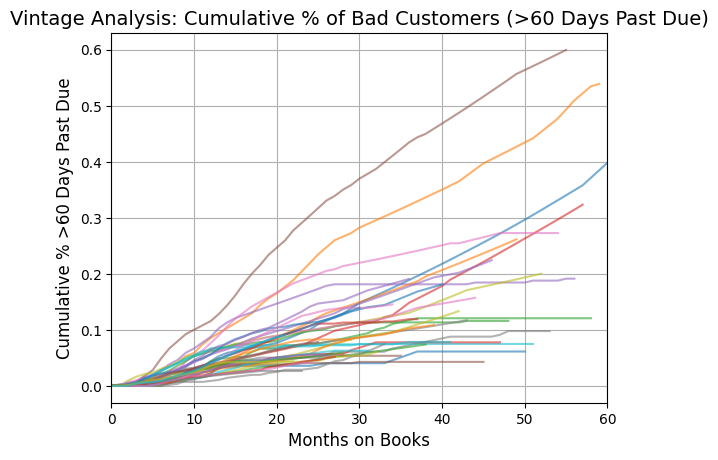

In [356]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.facecolor'] = 'white'

vintage_cum = vintage_wide.cumsum(axis=1)
vintage_cum.T.plot(legend=False, grid=True, alpha=0.6)


plt.title('Vintage Analysis: Cumulative % of Bad Customers (>60 Days Past Due)', fontsize=14)
plt.xlabel('Months on Books', fontsize=12)
plt.ylabel('Cumulative % >60 Days Past Due', fontsize=12)


plt.xlim(0, 60)


plt.show()

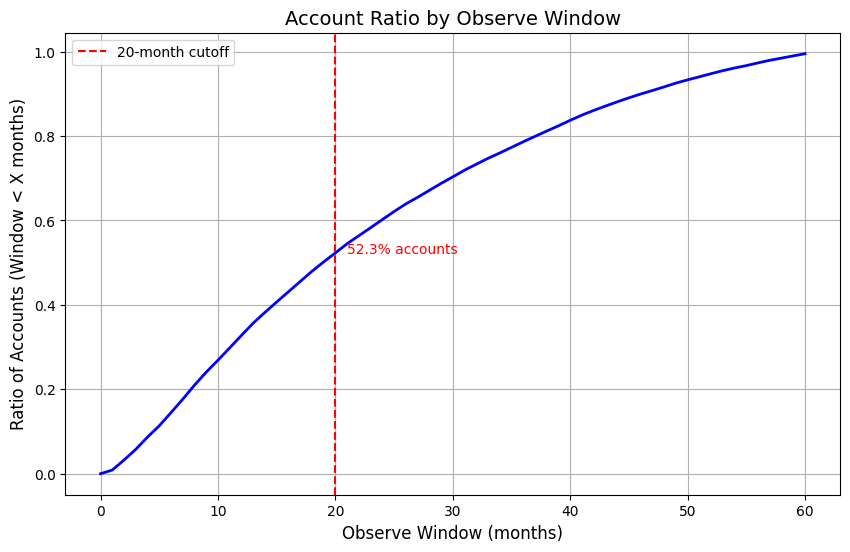

In [357]:
# analyze the account ratio by observe window
lst = []
total_accounts = pivot_tb['ID'].nunique()


for i in range(0, 61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / total_accounts
    lst.append(ratio)


account_ratio_series = pd.Series(lst, index=range(0, 61))


plt.figure(figsize=(10,6))
account_ratio_series.plot(legend=False, grid=True, linewidth=2, color='blue')


plt.axvline(20, color='red', linestyle='--', label='20-month cutoff')
plt.text(21, account_ratio_series[20], f'{account_ratio_series[20]:.1%} accounts', color='red')

plt.title('Account Ratio by Observe Window', fontsize=14)
plt.xlabel('Observe Window (months)', fontsize=12)
plt.ylabel('Ratio of Accounts (Window < X months)', fontsize=12)


plt.legend()


plt.show()

notes: What this graph means: When you select an observation window of 20 months, if the y-axis ratio is 52.3%, it means:
About 52.3% of accounts with a life cycle of less than 20 months will be screened out. The remaining 47.7% of accounts with a life cycle of ≥ 20 months can be used for stable vintage analysis and risk label construction.

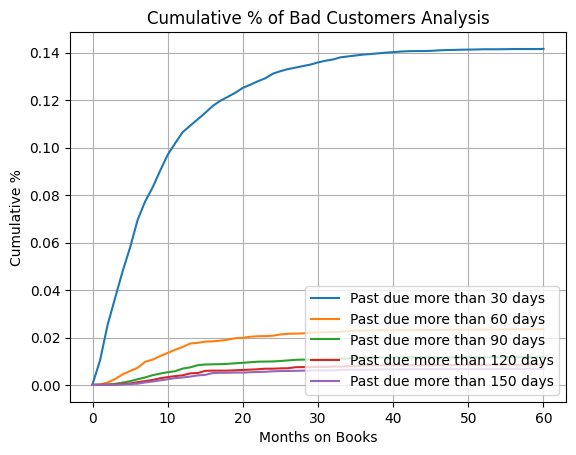

In [358]:
def calculate_observe(credit, command):
    '''Calculate observe window'''
    id_sum = len(set(credit['ID']))  
    credit = credit.copy()  
    credit['status'] = 0
    
    
    exec(command)

    
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    
    # calculate the cumulative bad rate
    obslst = pd.DataFrame({'month_on_book': range(0, 61), 'rate': None})
    lst = []
    for i in range(0, 61):
        due = list(minagg[minagg['month_on_book'] == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum
    
    return obslst['rate']




command = "credit.loc[(credit['STATUS'].isin(['0', '1', '2', '3', '4', '5'])), 'status'] = 1"
morethan1 = calculate_observe(credit, command)

command = "credit.loc[(credit['STATUS'].isin(['1', '2', '3', '4', '5'])), 'status'] = 1"
morethan30 = calculate_observe(credit, command)

command = "credit.loc[(credit['STATUS'].isin(['2', '3', '4', '5'])), 'status'] = 1"
morethan60 = calculate_observe(credit, command)

command = "credit.loc[(credit['STATUS'].isin(['3', '4', '5'])), 'status'] = 1"
morethan90 = calculate_observe(credit, command)

command = "credit.loc[(credit['STATUS'].isin(['4', '5'])), 'status'] = 1"
morethan120 = calculate_observe(credit, command)

command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)


obslst = pd.DataFrame({
    'Months on Books': range(0, 61),
    'Past due more than 30 days': morethan30,
    'Past due more than 60 days': morethan60,
    'Past due more than 90 days': morethan90,
    'Past due more than 120 days': morethan120,
    'Past due more than 150 days': morethan150
})

# draw the plot
obslst.plot(x='Months on Books', grid=True, title='Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.legend(loc='lower right')
plt.show()

notes: For longer overdue dates, a longer observation window is needed. For example, it takes at least 5 months for the first bad customer to appear for overdue dates of more than 150 days. In most cases, a 20-month observation window can cover most bad customers. However, for overdue dates of 30 days, we can see that there are still new bad customers joining the list after 30 months on the books. Therefore, an observation window of 20 MOB would be appropriate.

In [359]:
credit0 = credit.copy()
def calculate_rate(pivot_tb, command): 
    '''calculate bad customer rate'''
    credit0['status'] = 0 
    exec(command) 
    sumagg = credit0.groupby('ID')['status'].agg('sum').reset_index()
    pivot_tb_merge = pd.merge(pivot_tb[['ID']], sumagg, on='ID', how='left')
    pivot_tb_merge['status'] = pivot_tb_merge['status'].fillna(0)
    pivot_tb_merge.loc[pivot_tb_merge['status'] > 1, 'status'] = 1  
    rate = pivot_tb_merge['status'].sum() / len(pivot_tb_merge)
    return round(rate, 5)


commands = {
    'past due more than 1 day': "credit0.loc[credit0['STATUS'].isin(['0','1','2','3','4','5']), 'status'] = 1",
    'past due more than 30 days': "credit0.loc[credit0['STATUS'].isin(['1','2','3','4','5']), 'status'] = 1",
    'past due more than 60 days': "credit0.loc[credit0['STATUS'].isin(['2','3','4','5']), 'status'] = 1",
    'past due more than 90 days': "credit0.loc[credit0['STATUS'].isin(['3','4','5']), 'status'] = 1",
    'past due more than 120 days': "credit0.loc[credit0['STATUS'].isin(['4','5']), 'status'] = 1",
    'past due more than 150 days': "credit0.loc[credit0['STATUS']=='5', 'status'] = 1"
}


summary_list = []
for situation, cmd in commands.items():
    rate = calculate_rate(pivot_tb, cmd)
    summary_list.append((situation, rate))


summary_dt = pd.DataFrame(summary_list, columns=['situation', 'bad customer ratio'])


display(summary_dt)

situation  bad customer ratio
0     past due more than 1 day             0.39432
1   past due more than 30 days             0.06443
2   past due more than 60 days             0.01070
3   past due more than 90 days             0.00537
4  past due more than 120 days             0.00391
5  past due more than 150 days             0.00311

notes: Here we can see that 60 days is a suitable choice for judging whether it is a bad account (with a probability of about 6%), that is, if the value is greater than or equal to 1, we can judge it as a bad user.

In [360]:
# label the status
df2_new['label'] = np.where(df2_new['STATUS'].isin(['1','2', '3', '4', '5']), 1, 0)
customer_label = df2_new.groupby('ID')['label'].max().reset_index()
display(customer_label.head(30))

ID  label
0   5001711      0
1   5001712      0
2   5001713      0
3   5001714      0
4   5001715      0
5   5001717      0
6   5001718      1
7   5001719      0
8   5001720      1
9   5001723      0
10  5001724      0
11  5001725      0
12  5001726      0
13  5001728      0
14  5001729      0
15  5001730      0
16  5001731      0
17  5001732      0
18  5001733      0
19  5001734      0
20  5001735      0
21  5001736      0
22  5001737      0
23  5001738      0
24  5001739      0
25  5001742      0
26  5001743      0
27  5001744      0
28  5001745      0
29  5001746      0

In [361]:

label_counts = customer_label['label'].value_counts().rename({0: 'Good (0)', 1: 'Bad (1)'})
label_ratios = customer_label['label'].value_counts(normalize=True).rename({0: 'Good (0)', 1: 'Bad (1)'})


label_summary = pd.DataFrame({
    'Count': label_counts,
    'Ratio (%)': (label_ratios * 100).round(2)
})

print(label_summary)


          Count  Ratio (%)
label                     
Good (0)  40635      88.37
Bad (1)    5350      11.63


2.3 Convert data

In [362]:
final_data = pd.merge(customer_label, df_new, on='ID', how='inner')
display(final_data)

ID  label CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      5008806      0           M             1                1   
1      5008808      0           F             0                1   
2      5008809      0           F             0                1   
3      5008810      0           F             0                1   
4      5008811      0           F             0                1   
...        ...    ...         ...           ...              ...   
25121  5150482      0           F             1                1   
25122  5150483      0           F             1                1   
25123  5150484      0           F             1                1   
25124  5150485      0           F             1                1   
25125  5150487      0           M             1                0   

       CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0                 0          112500.0               Working   
1                 0          270000.0  Commercial associate   
2                 0          270000.0  Commercial associate   
3                 0          270000.0  Commercial associate   
4                 0          270000.0  Commercial associate   
...             ...               ...                   ...   
25121             1          157500.0               Working   
25122             1          157500.0               Working   
25123             1          157500.0               Working   
25124             1          157500.0               Working   
25125             0          202500.0               Working   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ... DAYS_BIRTH  \
0      Secondary / secondary special               Married  ...     -21474   
1      Secondary / secondary special  Single / not married  ...     -19110   
2      Secondary / secondary special  Single / not married  ...     -19110   
3      Secondary / secondary special  Single / not married  ...     -19110   
4      Secondary / secondary special  Single / not married  ...     -19110   
...                              ...                   ...  ...        ...   
25121  Secondary / secondary special               Married  ...     -10808   
25122  Secondary / secondary special               Married  ...     -10808   
25123  Secondary / secondary special               Married  ...     -10808   
25124  Secondary / secondary special               Married  ...     -10808   
25125  Secondary / secondary special               Married  ...     -19398   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
0              -1134           1                0           0           0   
1              -3051           1                0           1           1   
2              -3051           1                0           1           1   
3              -3051           1                0           1           1   
4              -3051           1                0           1           1   
...              ...         ...              ...         ...         ...   
25121          -1739           1                0           0           0   
25122          -1739           1                0           0           0   
25123          -1739           1                0           0           0   
25124          -1739           1                0           0           0   
25125          -2166           1                0           0           0   

       OCCUPATION_TYPE CNT_FAM_MEMBERS  AGE  DAYS_EMPLOYED_CLEAN  
0       Security staff             2.0   59                  3.0  
1          Sales staff             1.0   52                  8.5  
2          Sales staff             1.0   52                  8.5  
3          Sales staff             1.0   52                  8.5  
4          Sales staff             1.0   52                  8.5  
...                ...             ...  ...                  ...  
25121       Core staff             3.0   30                  5.0  
25122       Core staff             3.0  

In [363]:
# final file
final_data.to_csv('./cleaned_data/final_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: './cleaned_data/final_data.csv'

3 EDA

In [ ]:
file_path = './cleaned_data/final_data.csv'
data = pd.read_csv(file_path)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25126 entries, 0 to 25125
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   25126 non-null  int64  
 1   label                25126 non-null  int64  
 2   CODE_GENDER          25126 non-null  object 
 3   FLAG_OWN_CAR         25126 non-null  int64  
 4   FLAG_OWN_REALTY      25126 non-null  int64  
 5   CNT_CHILDREN         25126 non-null  int64  
 6   AMT_INCOME_TOTAL     25126 non-null  float64
 7   NAME_INCOME_TYPE     25126 non-null  object 
 8   NAME_EDUCATION_TYPE  25126 non-null  object 
 9   NAME_FAMILY_STATUS   25126 non-null  object 
 10  NAME_HOUSING_TYPE    25126 non-null  object 
 11  DAYS_BIRTH           25126 non-null  int64  
 12  DAYS_EMPLOYED        25126 non-null  int64  
 13  FLAG_MOBIL           25126 non-null  int64  
 14  FLAG_WORK_PHONE      25126 non-null  int64  
 15  FLAG_PHONE           25126 non-null 

In [ ]:
print(data.describe(include='all'))

                  ID         label CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count   2.512600e+04  25126.000000       25126  25126.000000     25126.000000   
unique           NaN           NaN           2           NaN              NaN   
top              NaN           NaN           F           NaN              NaN   
freq             NaN           NaN       15625           NaN              NaN   
mean    5.078834e+06      0.122901         NaN      0.418491         0.655019   
std     4.193489e+04      0.328330         NaN      0.493321         0.475372   
min     5.008806e+06      0.000000         NaN      0.000000         0.000000   
25%     5.042232e+06      0.000000         NaN      0.000000         0.000000   
50%     5.079000e+06      0.000000         NaN      0.000000         1.000000   
75%     5.115599e+06      0.000000         NaN      1.000000         1.000000   
max     5.150487e+06      1.000000         NaN      1.000000         1.000000   

        CNT_CHILDREN  AMT_I

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Series([], dtype: float64)


In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
data_types = data.dtypes.value_counts()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")
print(f"Data types:\n{data_types}")

Numerical columns: ['ID', 'label', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE', 'DAYS_EMPLOYED_CLEAN']
Categorical columns: ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
Data types:
int64      12
object      6
float64     3
Name: count, dtype: int64



Proportions:
label
0    0.877099
1    0.122901
Name: count, dtype: float64


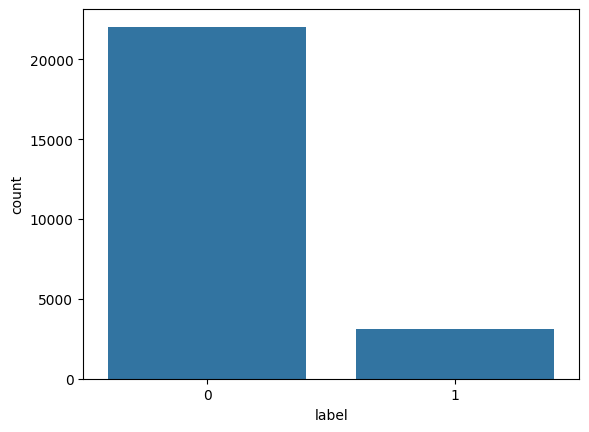

In [ ]:
label_counts = data['label'].value_counts()
sns.countplot(data=data, x='label')
total = len(data)
target_proportions = label_counts / total
print("\nProportions:")
print(target_proportions)


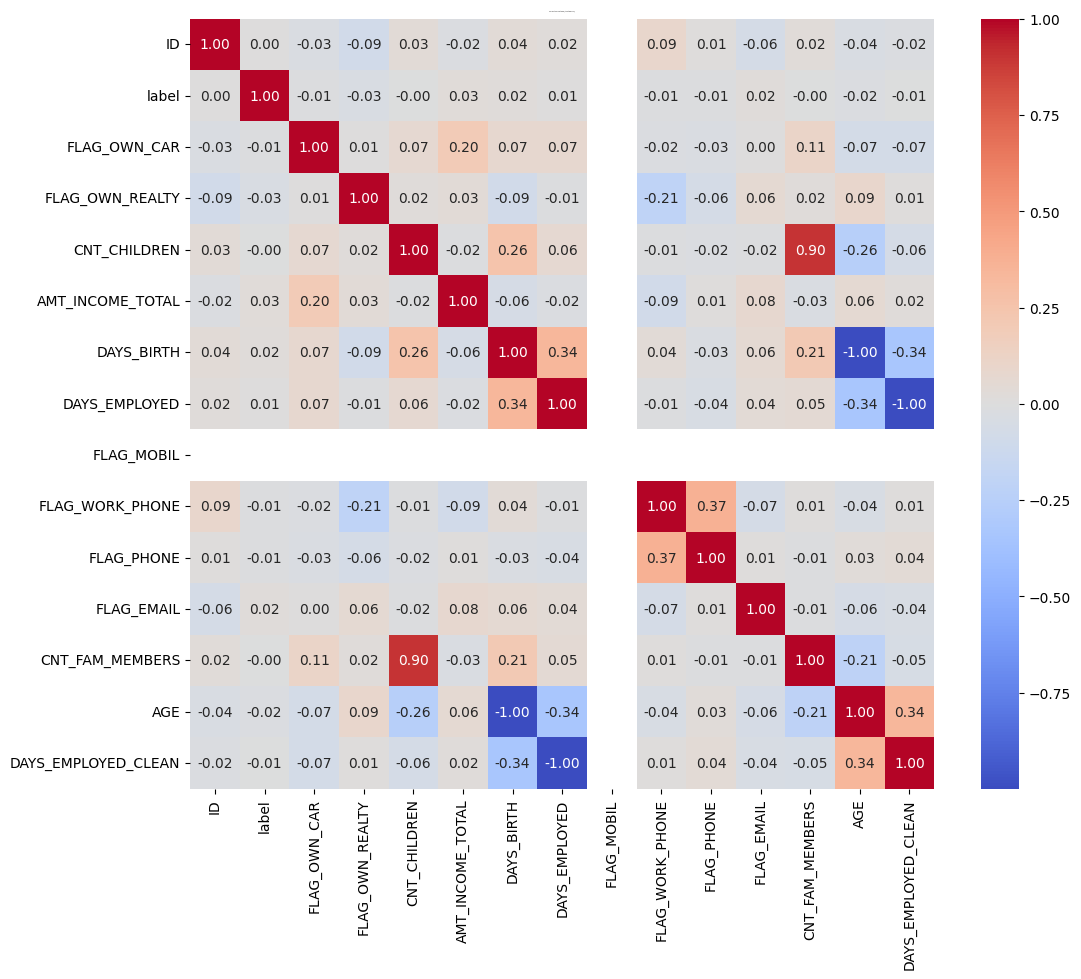

In [369]:
correlation_matrix = data[numerical_cols].corr()


plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap (Adjusted Size)', fontsize=1)
plt.show()

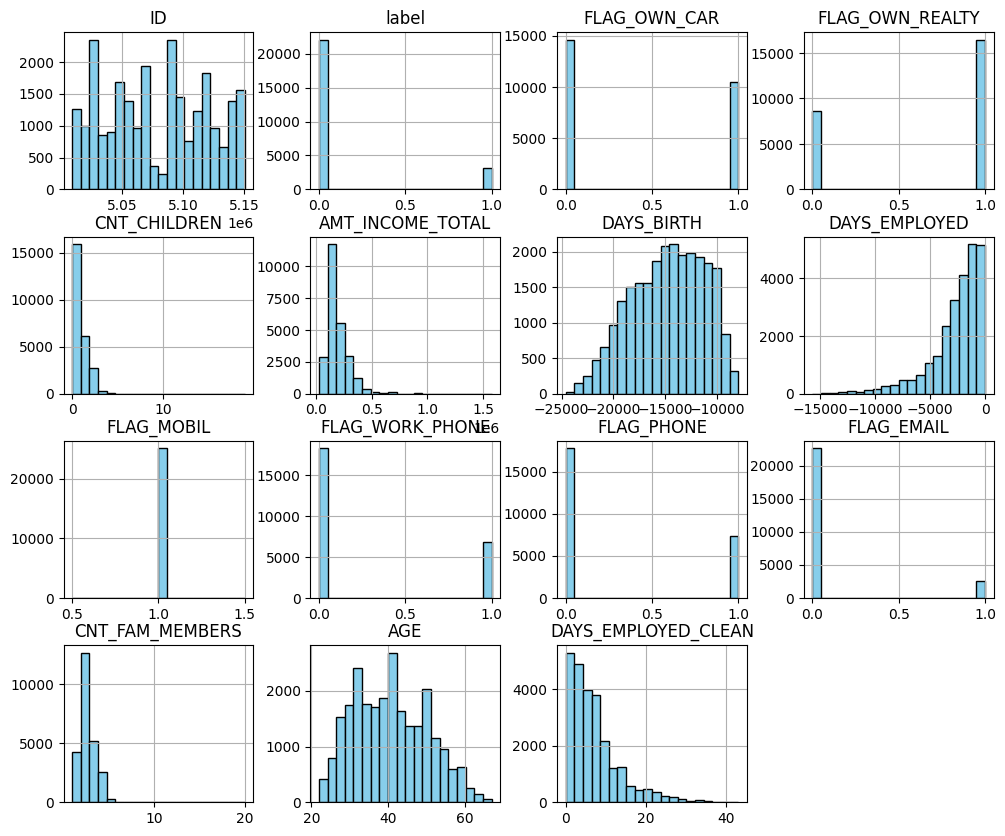

In [ ]:
data[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('', fontsize=16)
plt.show()

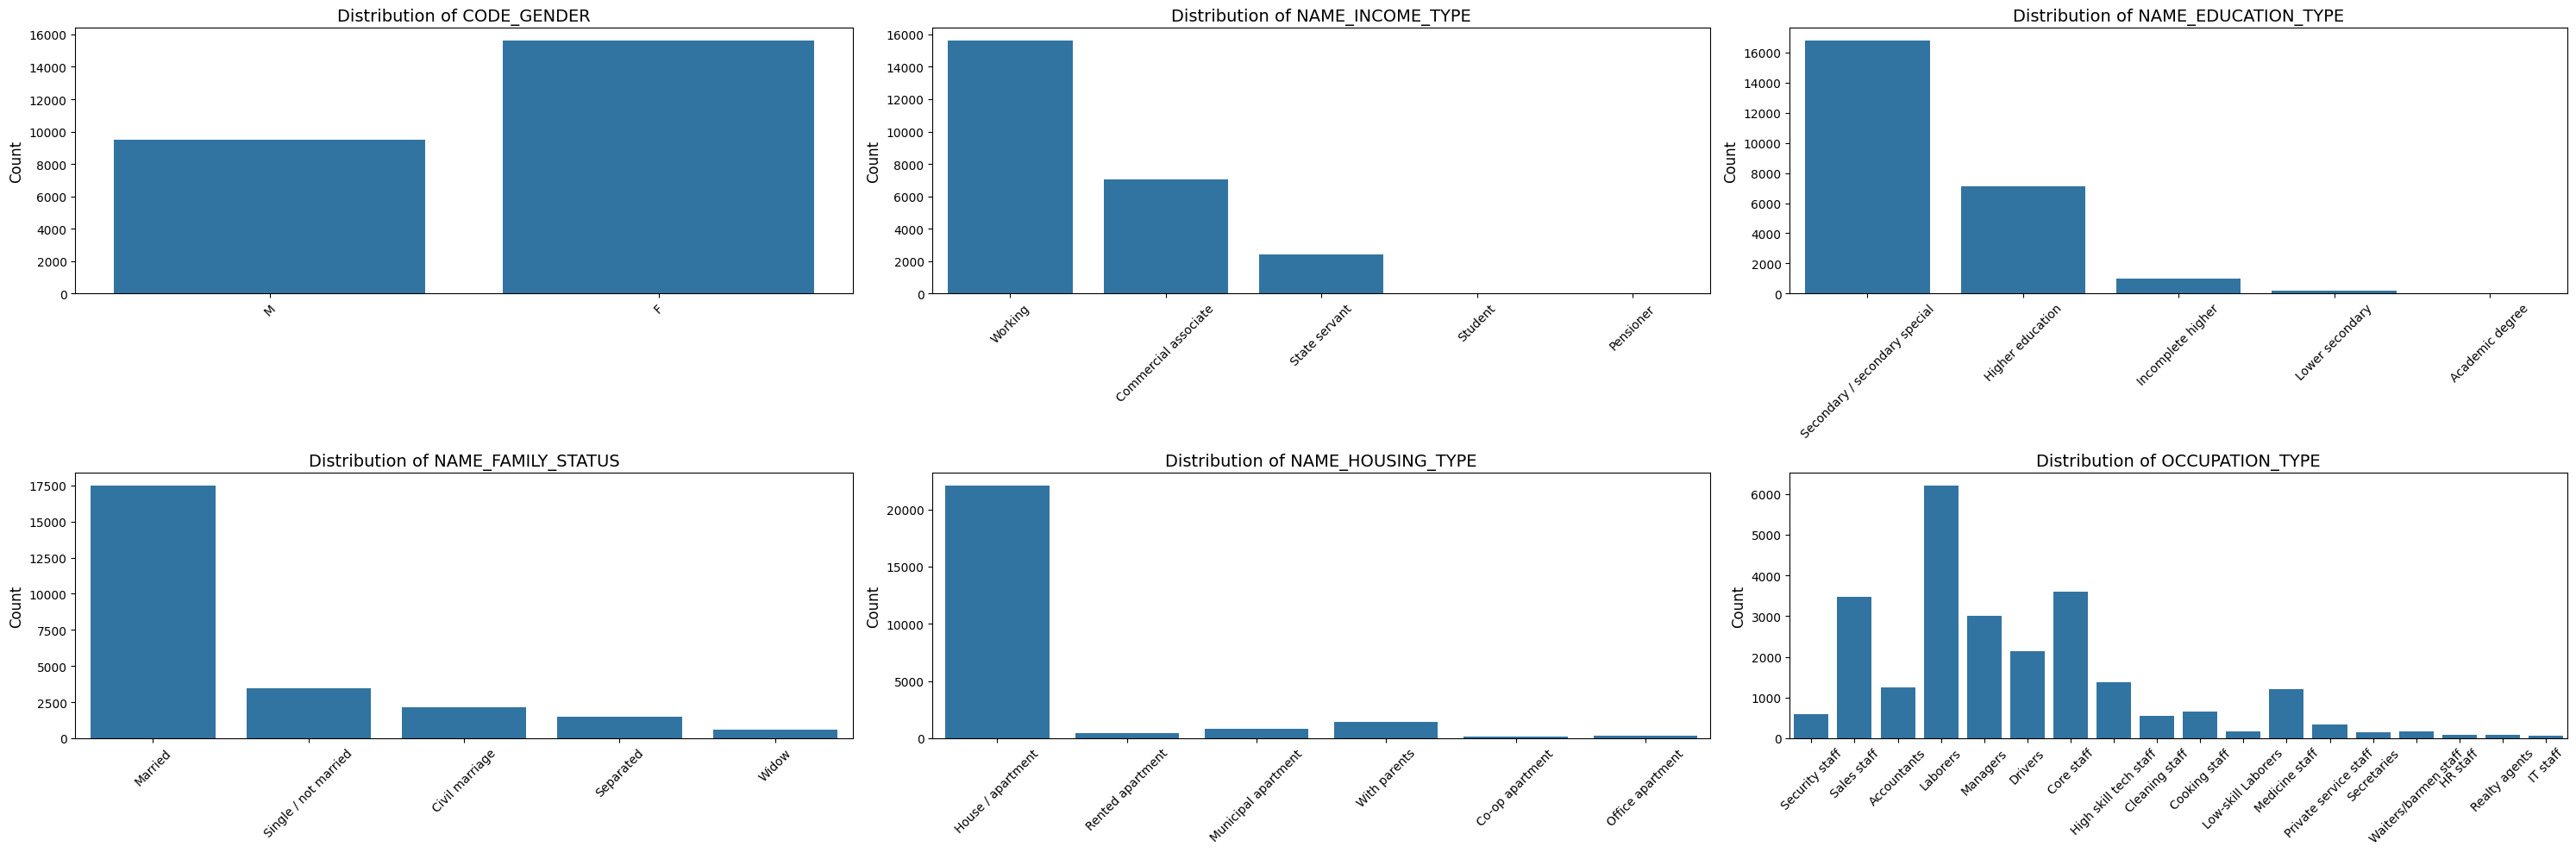

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10)) 


for col, ax in zip(columns, axes.flatten()):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14)  
    ax.set_xlabel('')  
    ax.set_ylabel('Count', fontsize=12) 
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd


contingency_table = pd.crosstab(data['NAME_INCOME_TYPE'], data['label'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("NAME_INCOME_TYPE influences label significantly")
else:
    print("NAME_INCOME_TYPE does not influence label significantly")

Chi-Square Statistic: 100.3676599900373
P-Value: 8.214333528650258e-21
NAME_INCOME_TYPE influences label significantly


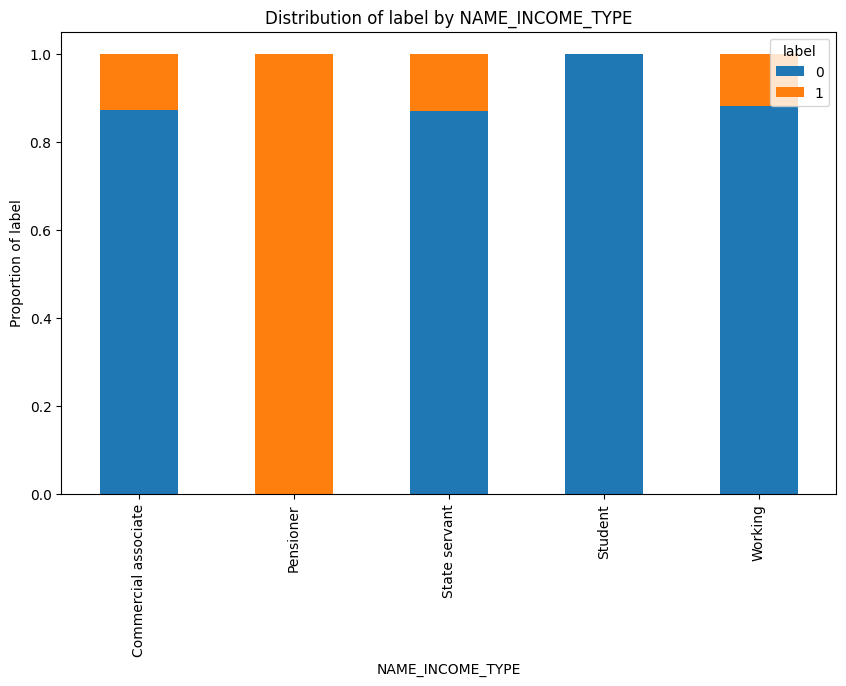

In [ ]:
income_id_distribution = pd.crosstab(data['NAME_INCOME_TYPE'], data['label'], normalize='index')

income_id_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of label by NAME_INCOME_TYPE")
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Proportion of label")
plt.legend(title="label")
plt.show()

In [ ]:

contingency_table = pd.crosstab(data['NAME_EDUCATION_TYPE'], data['label'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("NAME_EDUCATION_TYPE influences label significantly")
else:
    print("NAME_EDUCATION_TYPE does not influence label significantly")

Chi-Square Statistic: 15.344233229527068
P-Value: 0.004038008222221229
NAME_EDUCATION_TYPE influences label significantly


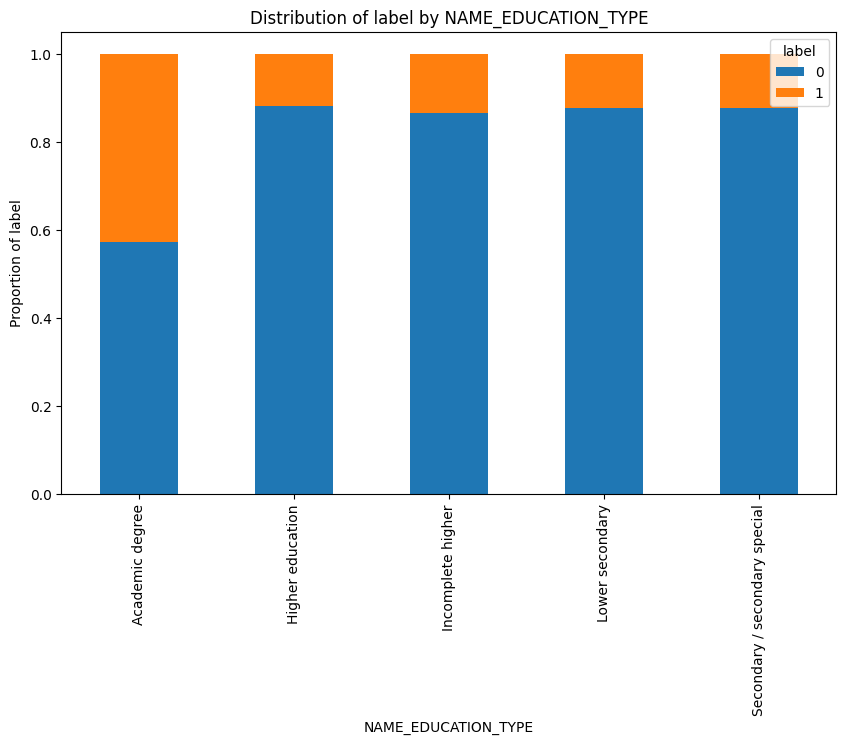

In [ ]:
education_id_distribution = pd.crosstab(data['NAME_EDUCATION_TYPE'], data['label'], normalize='index')

education_id_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of label by NAME_EDUCATION_TYPE")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Proportion of label")
plt.legend(title="label")
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['NAME_HOUSING_TYPE'], data['label'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("NAME_EDUCATION_TYPE influences label significantly")
else:
    print("NAME_EDUCATION_TYPE does not influence label significantly")

Chi-Square Statistic: 10.440365227299742
P-Value: 0.06367698138014961
NAME_EDUCATION_TYPE does not influence label significantly


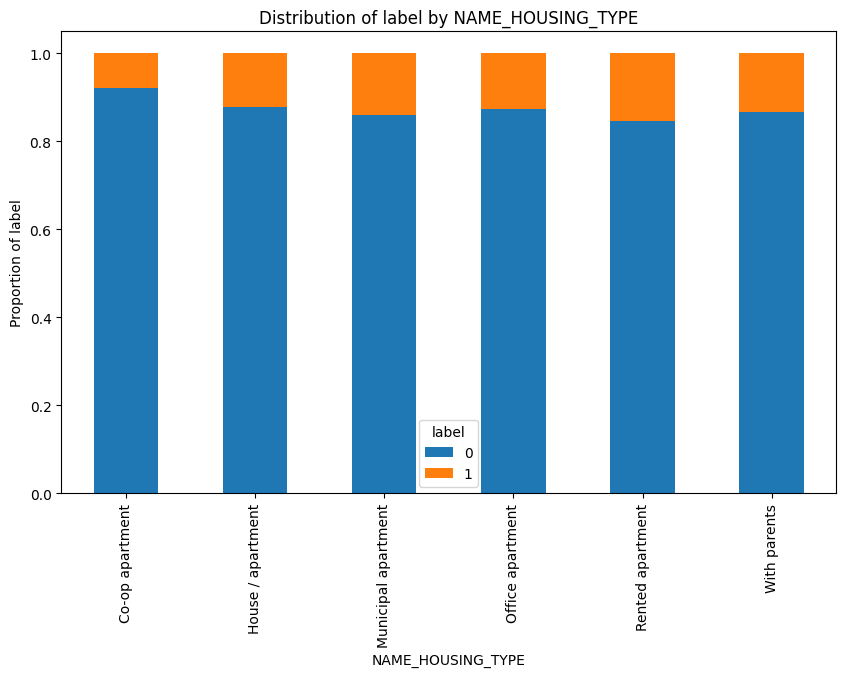

In [ ]:
housing_id_distribution = pd.crosstab(data['NAME_HOUSING_TYPE'], data['label'], normalize='index')

housing_id_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of label by NAME_HOUSING_TYPE")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Proportion of label")
plt.legend(title="label")
plt.show()

In [ ]:

data['Grouped_Housing_Type'] = data['NAME_HOUSING_TYPE'].apply(
    lambda x: x if x == 'House / apartment' else 'Other'
)


print(data['Grouped_Housing_Type'].value_counts())

Grouped_Housing_Type
House / apartment    22101
Other                 3025
Name: count, dtype: int64


In [ ]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(data['Grouped_Housing_Type'], data['label'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Grouped_Housing_Type influences label significantly")
else:
    print("Grouped_Housing_Type does not influence label significantly")

Chi-Square Statistic: 4.204229036767155
P-Value: 0.040323300046924776
Grouped_Housing_Type influences label significantly


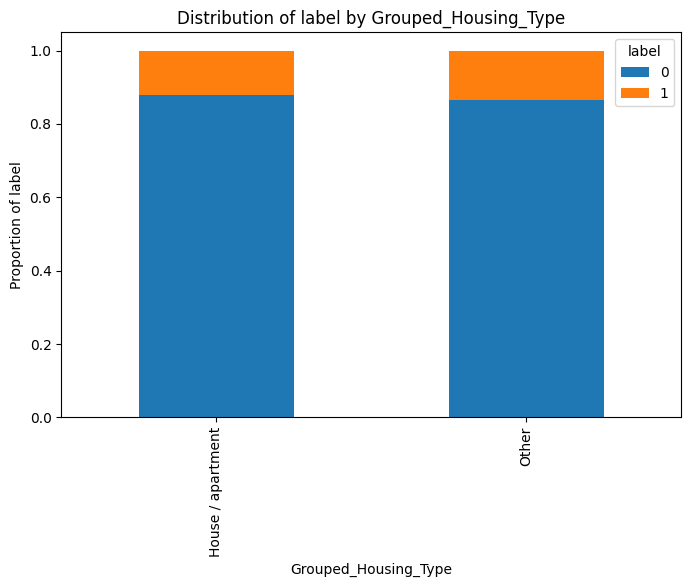

In [ ]:
housing_label_distribution = pd.crosstab(data['Grouped_Housing_Type'], data['label'], normalize='index')


housing_label_distribution.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Distribution of label by Grouped_Housing_Type")
plt.xlabel("Grouped_Housing_Type")
plt.ylabel("Proportion of label")
plt.legend(title="label")
plt.show()

In [ ]:
contingency_table = pd.crosstab(data['OCCUPATION_TYPE'], data['label'])


chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("OCCUPIED_TYPE influences label significantly")
else:
    print("OCUPIED_TYPE does not influence label significantly")

Chi-Square Statistic: 40.28365344266169
P-Value: 0.0011801035401269434
OCCUPIED_TYPE influences label significantly


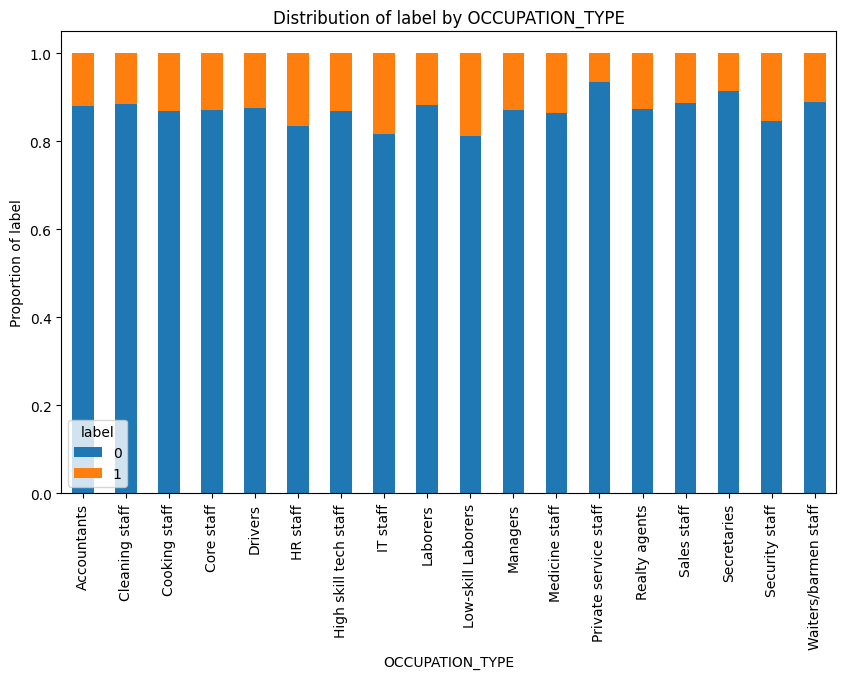


rate
label                         0         1
OCCUPATION_TYPE                          
Private service staff  0.935860  0.064140
Secretaries            0.913907  0.086093
Waiters/barmen staff   0.890805  0.109195
Sales staff            0.888186  0.111814
Cleaning staff         0.885662  0.114338
Laborers               0.882467  0.117533
Accountants            0.881547  0.118453
Drivers                0.876520  0.123480
Realty agents          0.873418  0.126582
Core staff             0.871309  0.128691
Managers               0.870518  0.129482
High skill tech staff  0.869125  0.130875
Cooking staff          0.868702  0.131298
Medicine staff         0.864954  0.135046
Security staff         0.846284  0.153716
HR staff               0.835294  0.164706
IT staff               0.816667  0.183333
Low-skill Laborers     0.811429  0.188571


In [ ]:
occupation_counts_distribution = pd.crosstab(data['OCCUPATION_TYPE'], data['label'], normalize='index')

occupation_counts_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of label by OCCUPATION_TYPE")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Proportion of label")
plt.legend(title="label")
plt.show()
occupation_counts_sorted = occupation_counts_distribution.sort_values(by=1, ascending=True)

print("\nrate")
print(occupation_counts_sorted)

In [ ]:
data = {
    'OCCUPATION_TYPE': [
        'Accountants', 'Cleaning staff', 'Drivers', 'Drivers', 
        'Managers', 'Cleaning staff', 'Laborers', 'Laborers',
        'Laborers', 'IT staff', 'Sales staff', 'Sales staff',
        'Waiters/barmen staff', 'Waiters/barmen staff', 'Security staff'
    ]
}
df = pd.DataFrame(data)


occupation_counts = df['OCCUPATION_TYPE'].value_counts()
occupation_proportions = occupation_counts / len(df) 


print("rate")
print(pd.DataFrame({'Count': occupation_counts, 'Proportion': occupation_proportions}))


rate
                      Count  Proportion
OCCUPATION_TYPE                        
Laborers                  3    0.200000
Cleaning staff            2    0.133333
Drivers                   2    0.133333
Sales staff               2    0.133333
Waiters/barmen staff      2    0.133333
Accountants               1    0.066667
Managers                  1    0.066667
IT staff                  1    0.066667
Security staff            1    0.066667


In [ ]:
data = data.drop(columns=['FLAG_MOBIL'], axis=1)

In [ ]:
data['NAME_HOUSING_TYPE_GROUPED'] = data['NAME_HOUSING_TYPE'].apply(
    lambda x: 'First Feature' if x == 'House / apartment' else 'Other'
)
print(data['NAME_HOUSING_TYPE_GROUPED'].value_counts())
data.drop(columns=['NAME_HOUSING_TYPE'], inplace=True)

NAME_HOUSING_TYPE_GROUPED
First Feature    22101
Other             3025
Name: count, dtype: int64


In [ ]:
data.to_csv('./cleaned_data/processed_data.csv', index=False, encoding='utf-8')

PermissionError: [Errno 13] Permission denied: './cleaned_data/processed_data.csv'

4. oversampling and undersampling

In [ ]:
file_path2 = './cleaned_data/processed_data.csv'
data2 = pd.read_csv(file_path2)
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25126 entries, 0 to 25125
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         25126 non-null  int64  
 1   label                      25126 non-null  int64  
 2   CODE_GENDER                25126 non-null  object 
 3   FLAG_OWN_CAR               25126 non-null  int64  
 4   FLAG_OWN_REALTY            25126 non-null  int64  
 5   CNT_CHILDREN               25126 non-null  int64  
 6   AMT_INCOME_TOTAL           25126 non-null  float64
 7   NAME_INCOME_TYPE           25126 non-null  object 
 8   NAME_EDUCATION_TYPE        25126 non-null  object 
 9   NAME_FAMILY_STATUS         25126 non-null  object 
 10  DAYS_BIRTH                 25126 non-null  int64  
 11  DAYS_EMPLOYED              25126 non-null  int64  
 12  FLAG_WORK_PHONE            25126 non-null  int64  
 13  FLAG_PHONE                 25126 non-null  int


numberdata Index(['ID', 'label', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE',
       'DAYS_EMPLOYED_CLEAN'],
      dtype='object')


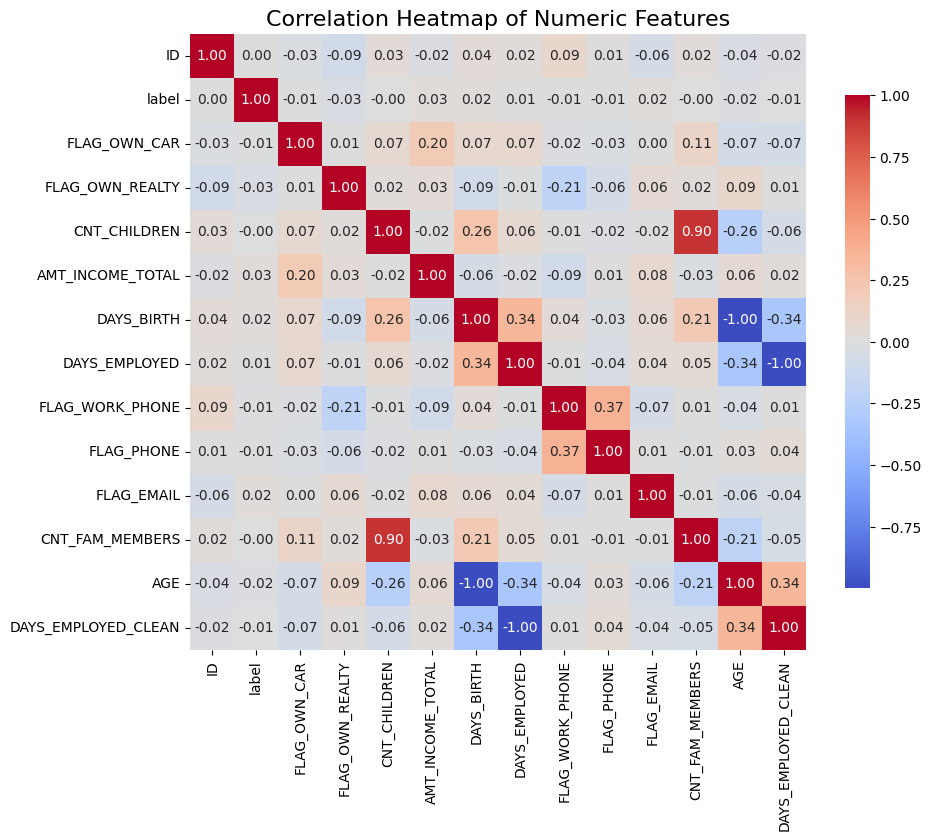

In [ ]:
numeric_features = data2.select_dtypes(include=['float64', 'int64']).columns
print("\nnumberdata", numeric_features)


correlation_matrix = data2[numeric_features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         
    cmap='coolwarm',    
    fmt=".2f",         
    square=True,        
    cbar_kws={'shrink': 0.8}  
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

In [ ]:
target_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'Grouped_Housing_Type', 'NAME_FAMILY_STATUS']

In [ ]:

print(data2[target_columns].head())

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE Grouped_Housing_Type  \
0               Working  Secondary / secondary special    House / apartment   
1  Commercial associate  Secondary / secondary special    House / apartment   
2  Commercial associate  Secondary / secondary special    House / apartment   
3  Commercial associate  Secondary / secondary special    House / apartment   
4  Commercial associate  Secondary / secondary special    House / apartment   

     NAME_FAMILY_STATUS  
0               Married  
1  Single / not married  
2  Single / not married  
3  Single / not married  
4  Single / not married  



combined distribution
combined
Working_Secondary / secondary special_House / apartment_Married                 7095
Commercial associate_Secondary / secondary special_House / apartment_Married    2634
Working_Higher education_House / apartment_Married                              2355
Commercial associate_Higher education_House / apartment_Married                 1412
Working_Secondary / secondary special_House / apartment_Single / not married    1132
                                                                                ... 
Working_Lower secondary_Other_Single / not married                                 1
Working_Incomplete higher_Other_Separated                                          1
State servant_Lower secondary_House / apartment_Civil marriage                     1
Working_Lower secondary_Other_Separated                                            1
Pensioner_Secondary / secondary special_Other_Civil marriage                       1
Name: count, Length: 101, dtype: 

Text(0, 0.5, 'Count')

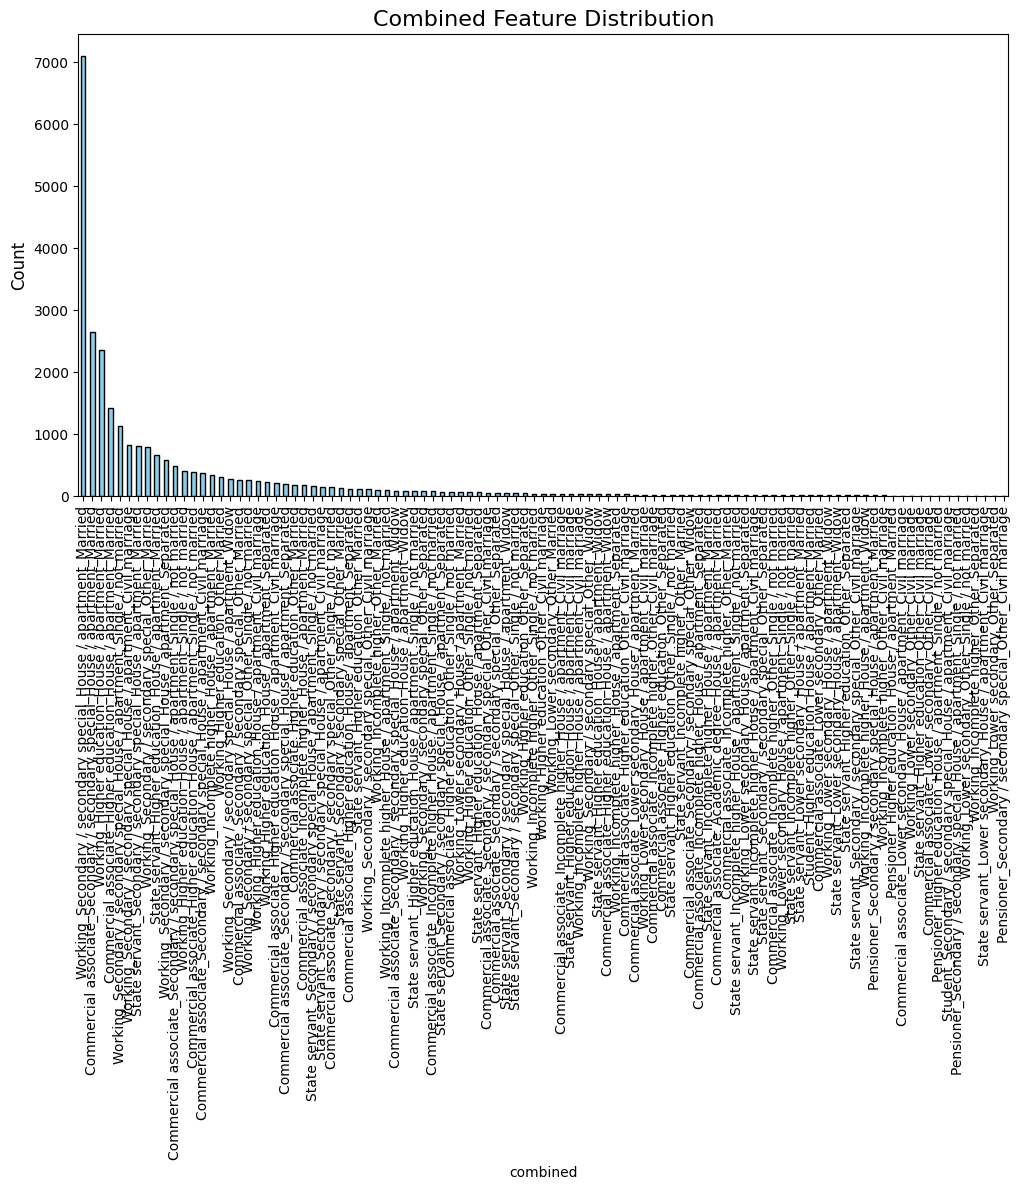

In [ ]:
data2['combined'] = data2[target_columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
print("\ncombined distribution")
print(data2['combined'].value_counts())


data2['combined'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')

print(data2['combined'].nunique())
unique_combinations = data2['combined'].unique()
print(f"Unique combinations: {unique_combinations}")
plt.title("Combined Feature Distribution", fontsize=16)
plt.ylabel("Count", fontsize=12)

In [ ]:
sample_counts = data2['combined'].value_counts().reset_index()
sample_counts.columns = ['combined', 'count']

display(sample_counts.head(10))

combined  count
0  Working_Secondary / secondary special_House / ...   7095
1  Commercial associate_Secondary / secondary spe...   2634
2  Working_Higher education_House / apartment_Mar...   2355
3  Commercial associate_Higher education_House / ...   1412
4  Working_Secondary / secondary special_House / ...   1132
5  Working_Secondary / secondary special_House / ...    813
6  State servant_Secondary / secondary special_Ho...    797
7  Working_Secondary / secondary special_Other_Ma...    793
8  State servant_Higher education_House / apartme...    659
9  Working_Secondary / secondary special_House / ...    583

In [ ]:
data2 = data2.merge(sample_counts, on='combined', how='left')
display(data2.shape)
display(data2.head(10))


(25126, 23)

ID  label CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806      0           M             1                1             0   
1  5008808      0           F             0                1             0   
2  5008809      0           F             0                1             0   
3  5008810      0           F             0                1             0   
4  5008811      0           F             0                1             0   
5  5008815      0           M             1                1             0   
6  5008819      0           M             1                1             0   
7  5008820      0           M             1                1             0   
8  5008821      0           M             1                1             0   
9  5008822      0           M             1                1             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          112500.0               Working  Secondary / secondary special   
1          270000.0  Commercial associate  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0               Working               Higher education   
6          135000.0  Commercial associate  Secondary / secondary special   
7          135000.0  Commercial associate  Secondary / secondary special   
8          135000.0  Commercial associate  Secondary / secondary special   
9          135000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  ...  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0               Married  ...           0           0   Security staff   
1  Single / not married  ...           1           1      Sales staff   
2  Single / not married  ...           1           1      Sales staff   
3  Single / not married  ...           1           1      Sales staff   
4  Single / not married  ...           1           1      Sales staff   
5               Married  ...           1           1      Accountants   
6               Married  ...           0           0         Laborers   
7               Married  ...           0           0         Laborers   
8               Married  ...           0           0         Laborers   
9               Married  ...           0           0         Laborers   

   CNT_FAM_MEMBERS  AGE DAYS_EMPLOYED_CLEAN  Grouped_Housing_Type  \
0              2.0   59                 3.0     House / apartment   
1              1.0   52                 8.5     House / apartment   
2              1.0   52                 8.5     House / apartment   
3              1.0   52                 8.5     House / apartment   
4              1.0   52                 8.5     House / apartment   
5              2.0   46                 2.0     House / apartment   
6              2.0   49                 3.5     House / apartment   
7              2.0   49                 3.5     House / apartment   
8              2.0   49                 3.5     House / apartment   
9              2.0   49                 3.5     House / apartment   

   NAME_HOUSING_TYPE_GROUPED  \
0              First Feature   
1              First Feature   
2              First Feature   
3              First Feature   
4              First Feature   
5              First Feature   
6              First Feature   
7              First Feature   
8              First Feature   
9              First Feature   

                                            combined count  
0  Working_Secondary / secondary special_House / ...  7095  
1  Commercial associate_Secondary / secondary spe...   478  
2  Commercial associate_Secondary / secondary spe...   478  
3  Commercial associate_Secondary / secondary spe...   478  
4  Commercial associate_Secondary / secondary spe...   478  
5  Working_Higher education_H

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.3, 
    random_state=42, 
    stratify=data2['label']  
)
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (17588, 23)
Test set shape: (7538, 23)



Distribution for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 10939
Commercial associate     4904
State servant            1733
Pensioner                   7
Student                     5
Name: count, dtype: int64

Distribution for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    11751
Higher education                  4999
Incomplete higher                  695
Lower secondary                    131
Academic degree                     12
Name: count, dtype: int64

Distribution for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 12246
Single / not married     2436
Civil marriage           1482
Separated                1020
Widow                     404
Name: count, dtype: int64

Distribution for Grouped_Housing_Type:
Grouped_Housing_Type
House / apartment    15457
Other                 2131
Name: count, dtype: int64

Distribution for combined:
combined
Working_Secondary / secondary special_House / apartment_Married                 

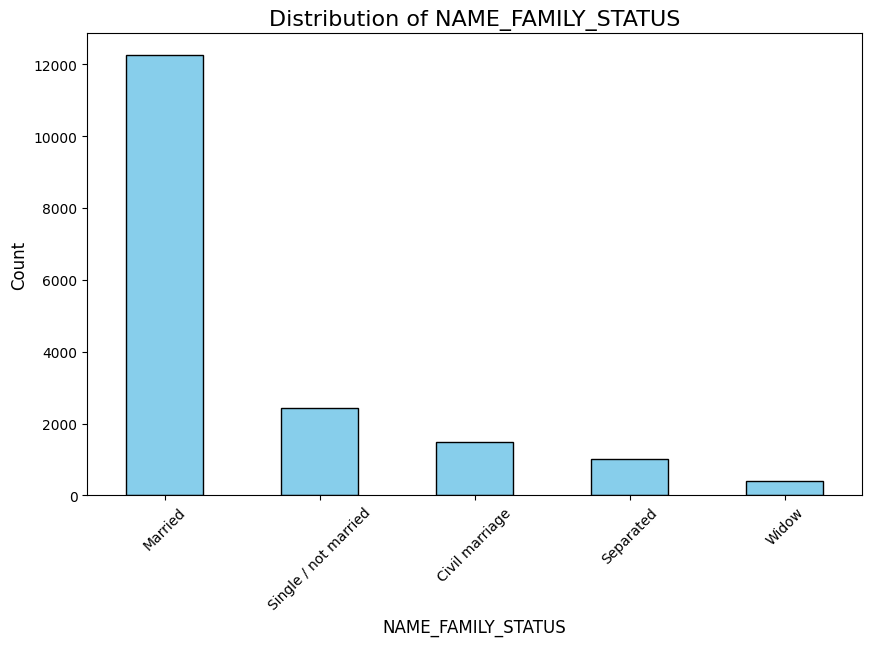

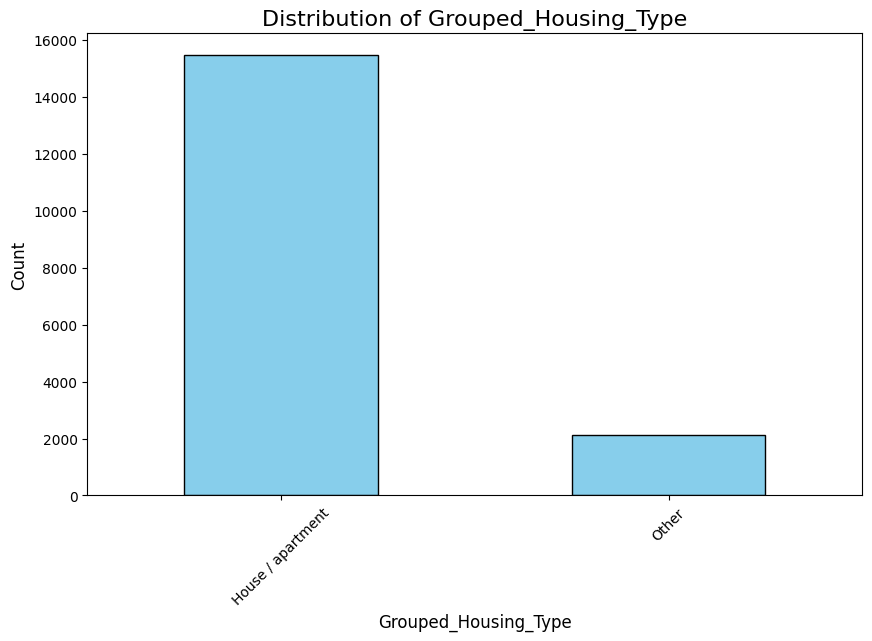

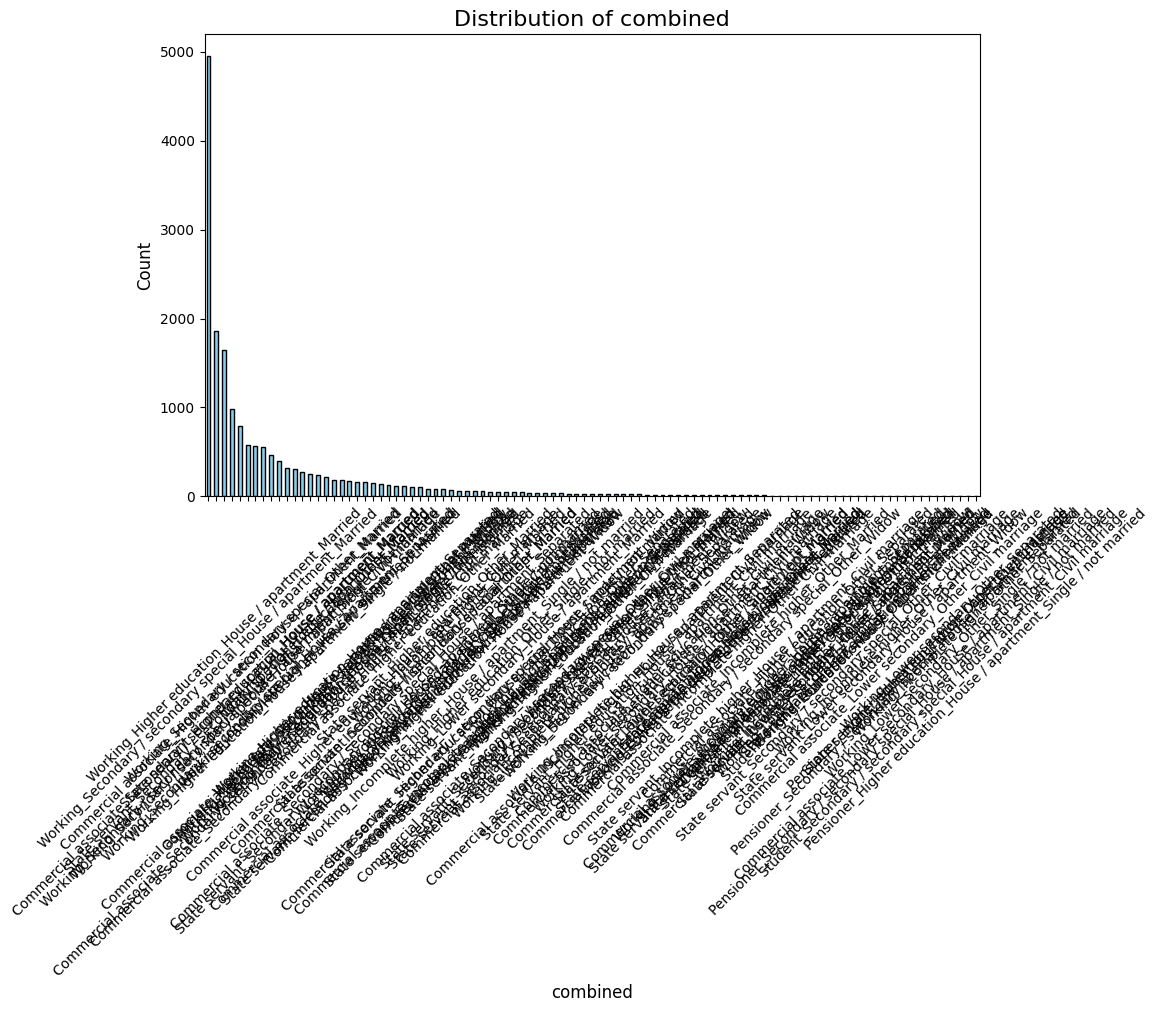

In [ ]:
columns_to_check = [
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'Grouped_Housing_Type',
    'combined',
]

for col in columns_to_check:
    print(f"\nDistribution for {col}:")
    print(train[col].value_counts())
for col in columns_to_check:
    plt.figure(figsize=(10, 6))
    train[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
train_count = train['combined'].value_counts()
display(train_count.describe())

count      99.000000
mean      177.656566
std       564.258104
min         1.000000
25%         7.000000
50%        28.000000
75%       113.500000
max      4951.000000
Name: count, dtype: float64


Balanced training set distribution:
combined
Commercial associate_Secondary / secondary special_House / apartment_Married    1000
Working_Secondary / secondary special_House / apartment_Married                 1000
Working_Higher education_House / apartment_Married                              1000
Commercial associate_Higher education_House / apartment_Married                  977
Working_Secondary / secondary special_House / apartment_Single / not married     787
                                                                                ... 
Commercial associate_Higher education_Other_Civil marriage                       150
Working_Lower secondary_Other_Civil marriage                                     150
Commercial associate_Higher education_House / apartment_Widow                    150
State servant_Higher education_Other_Civil marriage                              150
State servant_Higher education_Other_Separated                                   150
Name: count, Length

(21474, 23)

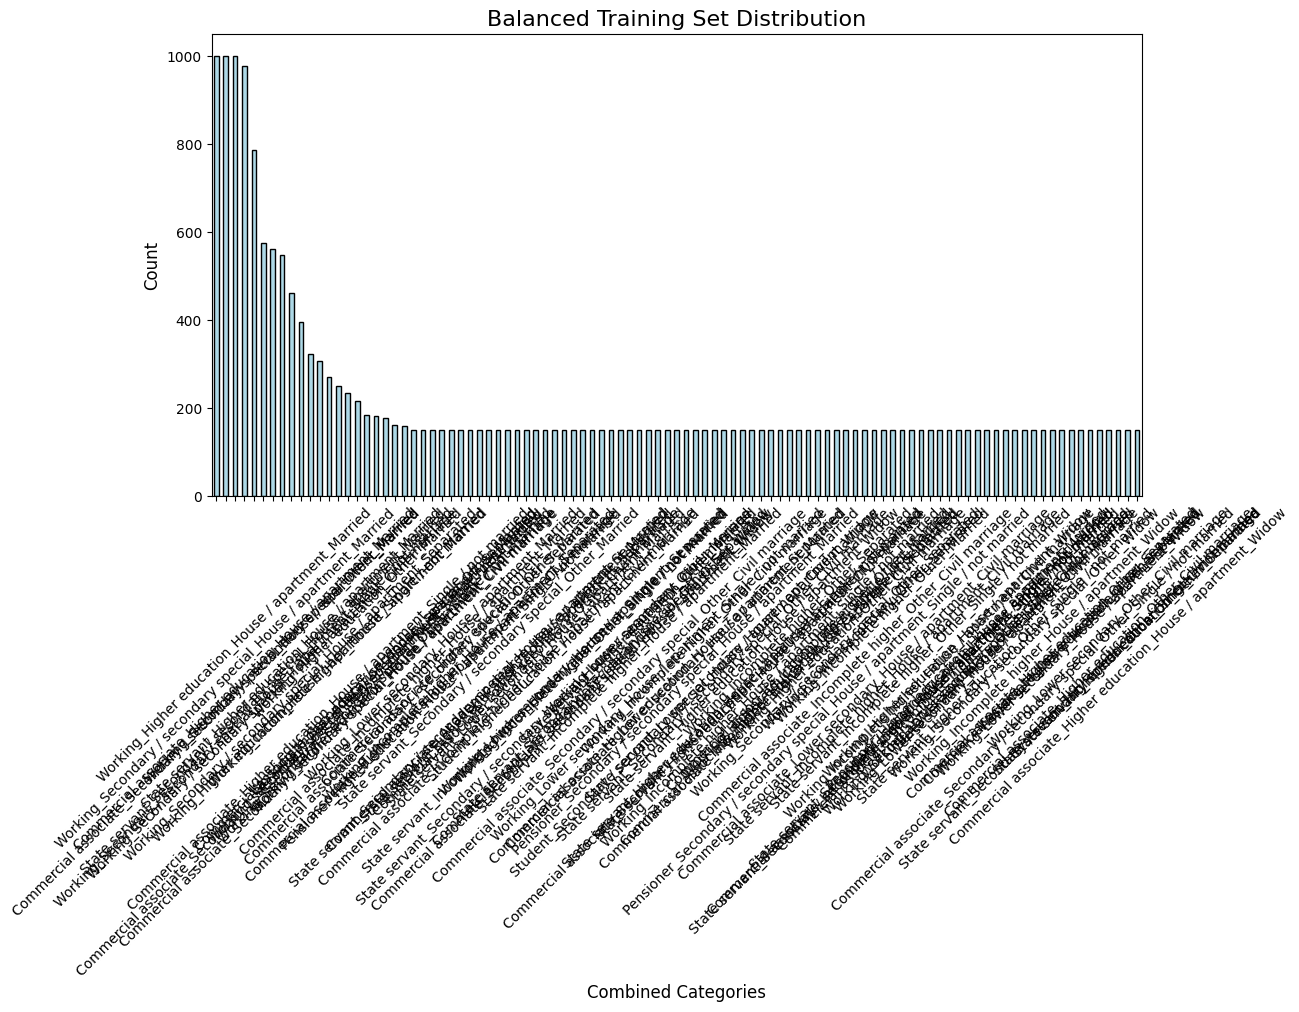

In [ ]:
min_samples = 150
max_samples = 1000

balanced_train = pd.DataFrame()
for label, group in train.groupby('combined'):
    if len(group) > max_samples:
       
        sampled_group = group.sample(n=max_samples, random_state=42)
    elif len(group) < min_samples:
        
        sampled_group = group.sample(n=min_samples, replace=True, random_state=42)
    else:
        
        sampled_group = group
    
  
    balanced_train = pd.concat([balanced_train, sampled_group])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)


print("\nBalanced training set distribution:")
print(balanced_train['combined'].value_counts())
display(balanced_train.shape)
balanced_train['combined'].value_counts().plot(kind='bar', figsize=(12, 6), color='lightblue', edgecolor='black')
plt.title("Balanced Training Set Distribution", fontsize=16)
plt.xlabel("Combined Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Distribution for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 9334
Commercial associate    6754
State servant           4486
Pensioner                600
Student                  300
Name: count, dtype: int64

Distribution for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    8986
Higher education                 6854
Incomplete higher                3234
Lower secondary                  2250
Academic degree                   150
Name: count, dtype: int64

Distribution for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 8747
Single / not married    4415
Civil marriage          3822
Separated               2807
Widow                   1683
Name: count, dtype: int64

Distribution for Grouped_Housing_Type:
Grouped_Housing_Type
House / apartment    14797
Other                 6677
Name: count, dtype: int64

Distribution for combined:
combined
Commercial associate_Secondary / secondary special_House / apartment_Married    1000
Working_Se

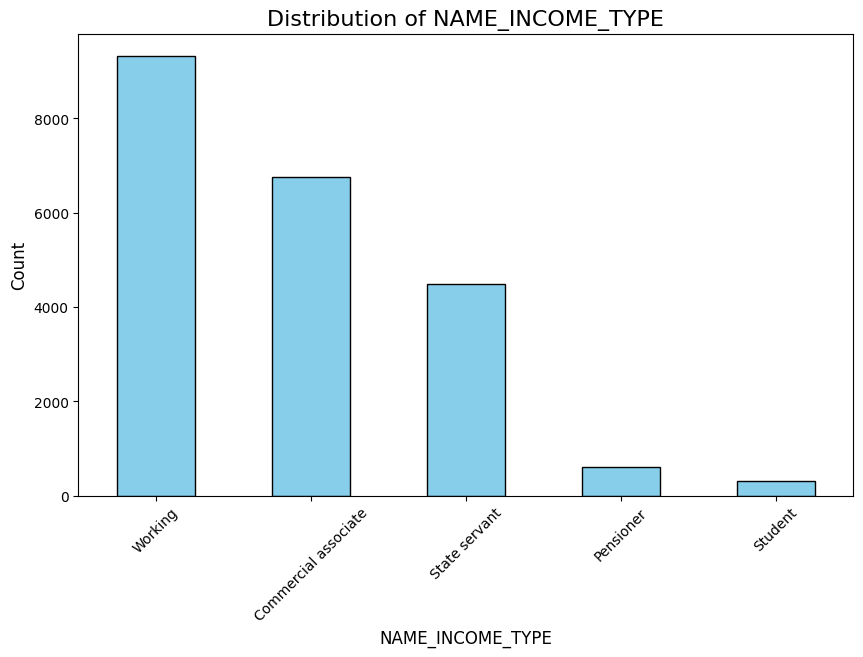

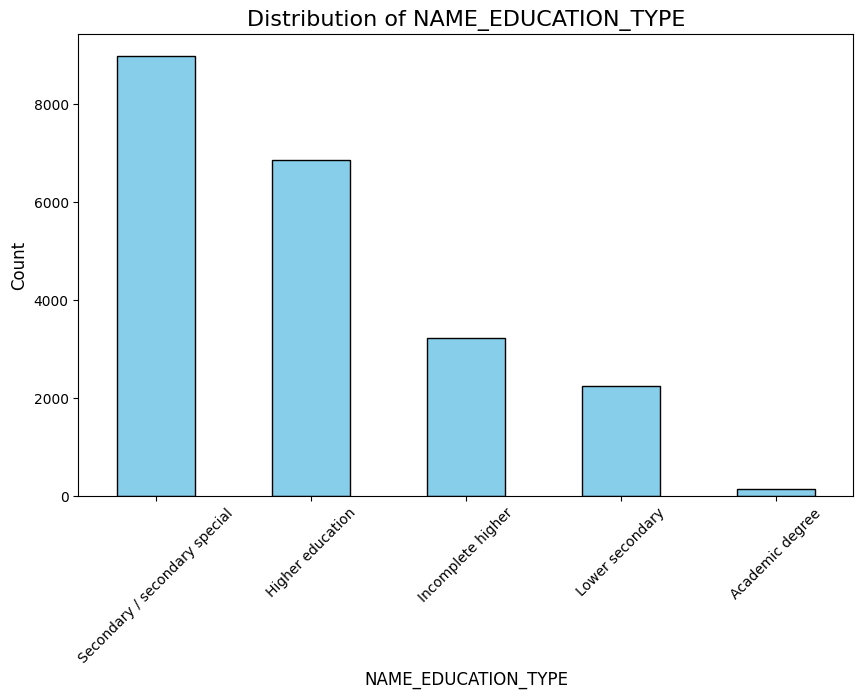

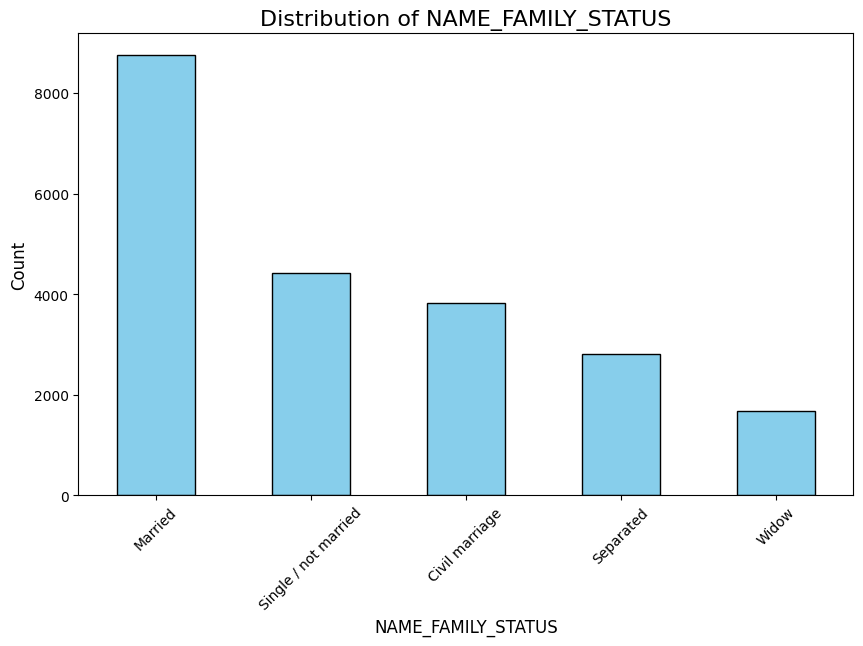

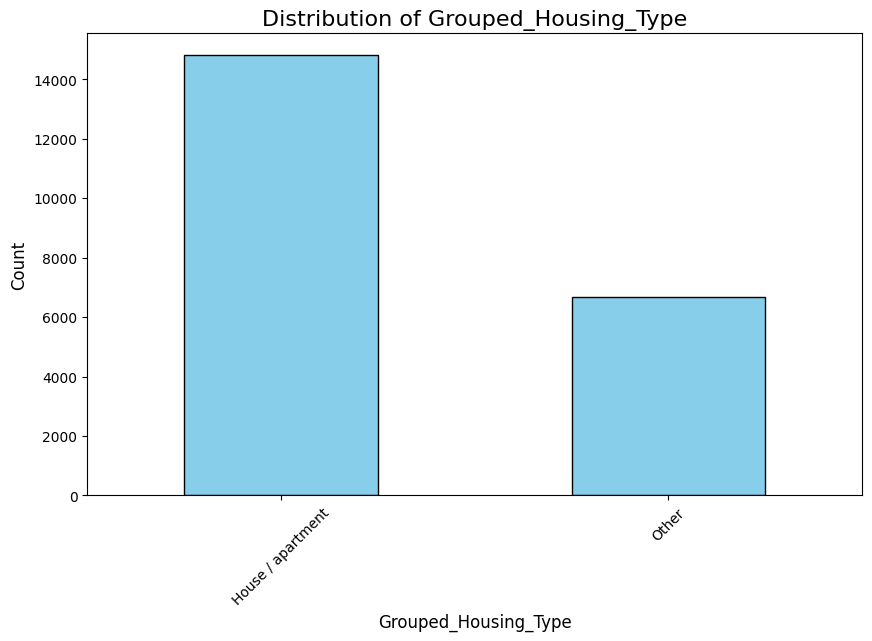

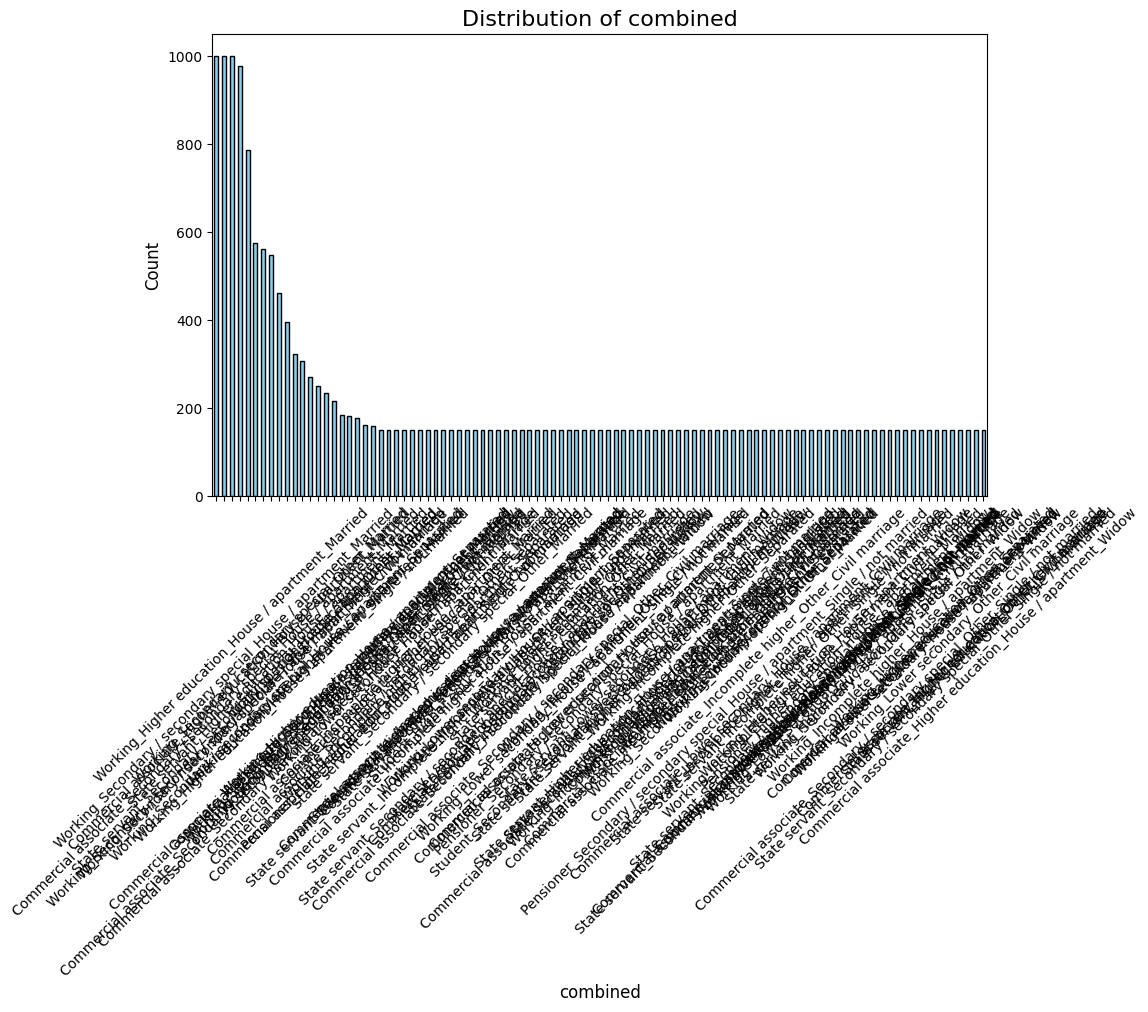

In [ ]:
for col in columns_to_check:
    print(f"\nDistribution for {col}:")
    print(balanced_train[col].value_counts())
for col in columns_to_check:
    plt.figure(figsize=(10, 6))
    balanced_train[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
columns_to_drop = ['combined', 'count_x', 'count_y', 'count']
balanced_train_cleaned = balanced_train.drop(columns=columns_to_drop, errors='ignore')

balanced_train_cleaned.to_csv("cleaned_data/balanced_training_set_70percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_70percent.csv", index=False, encoding="utf-8")



Training set shape: (20100, 23)
Test set shape: (5026, 23)


count      99.000000
mean      203.030303
std       647.396646
min         1.000000
25%         8.000000
50%        31.000000
75%       126.000000
max      5687.000000
Name: count, dtype: float64


Balanced training set distribution:
combined
Commercial associate_Higher education_House / apartment_Married                 1000
Working_Secondary / secondary special_House / apartment_Married                 1000
Commercial associate_Secondary / secondary special_House / apartment_Married    1000
Working_Higher education_House / apartment_Married                              1000
Working_Secondary / secondary special_House / apartment_Single / not married     889
                                                                                ... 
Working_Higher education_House / apartment_Widow                                 120
Working_Higher education_Other_Single / not married                              120
State servant_Secondary / secondary special_House / apartment_Widow              120
State servant_Higher education_House / apartment_Civil marriage                  120
State servant_Incomplete higher_House / apartment_Married                        120
Name: count, Length

(20077, 23)

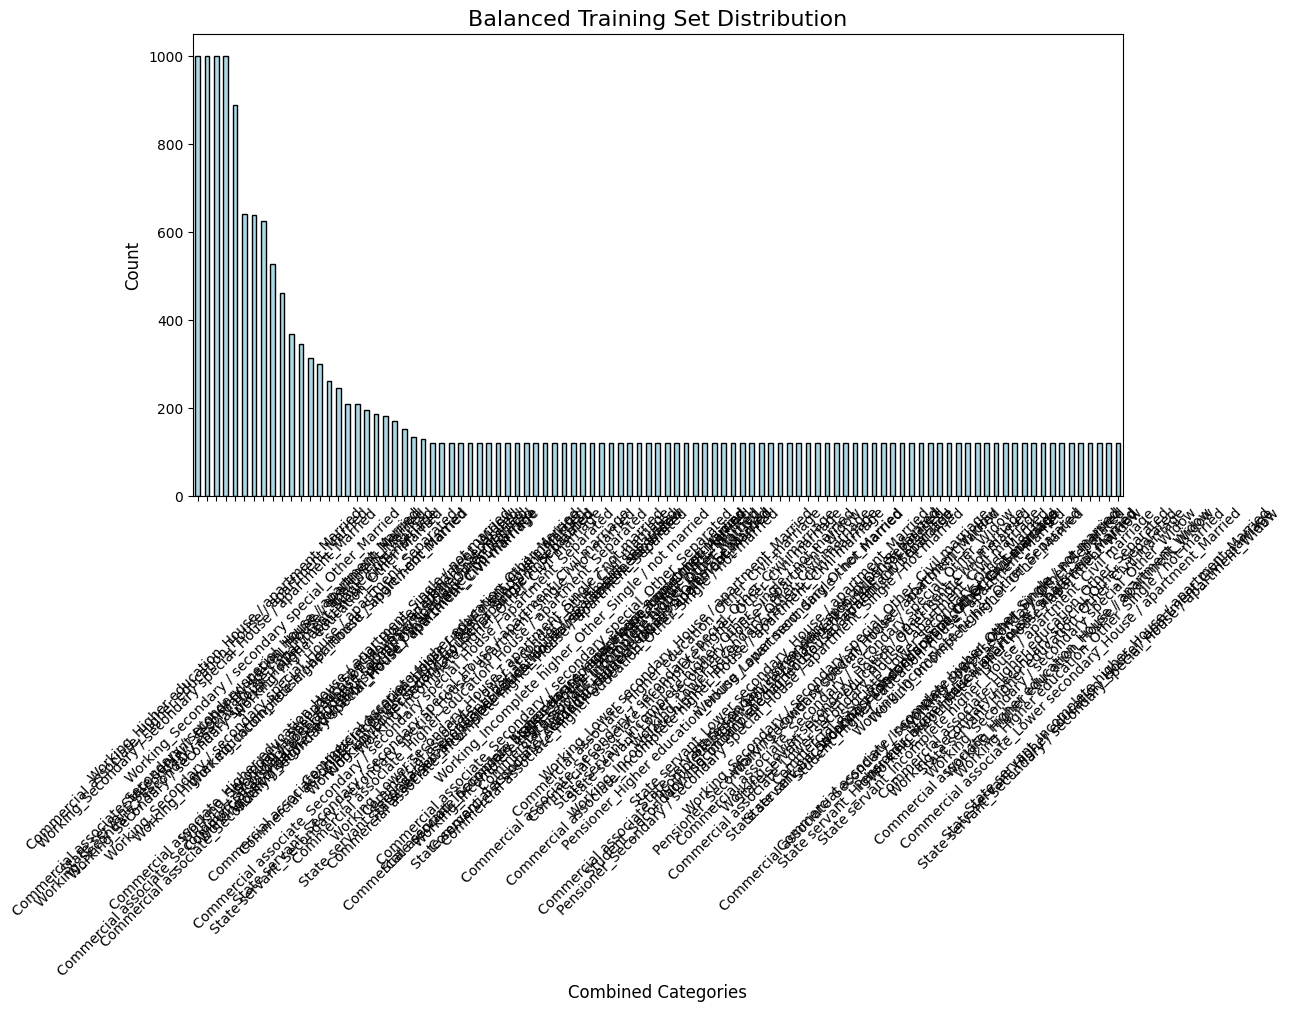


Distribution for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 9123
Commercial associate    6294
State servant           3940
Pensioner                480
Student                  240
Name: count, dtype: int64

Distribution for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    8986
Higher education                 6496
Incomplete higher                2675
Lower secondary                  1800
Academic degree                   120
Name: count, dtype: int64

Distribution for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 8565
Single / not married    4165
Civil marriage          3456
Separated               2482
Widow                   1409
Name: count, dtype: int64

Distribution for Grouped_Housing_Type:
Grouped_Housing_Type
House / apartment    14358
Other                 5719
Name: count, dtype: int64

Distribution for combined:
combined
Commercial associate_Higher education_House / apartment_Married                 1000
Working_Se

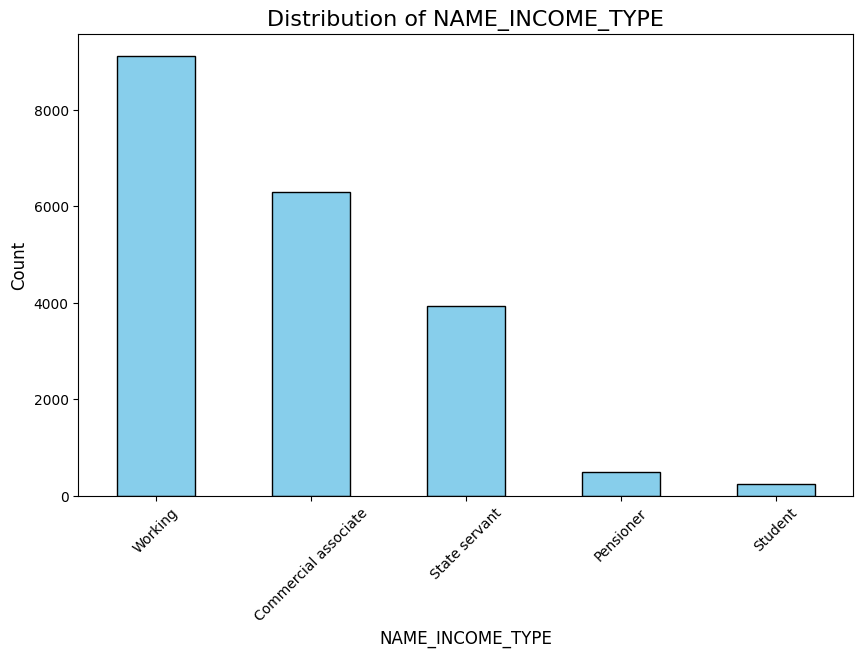

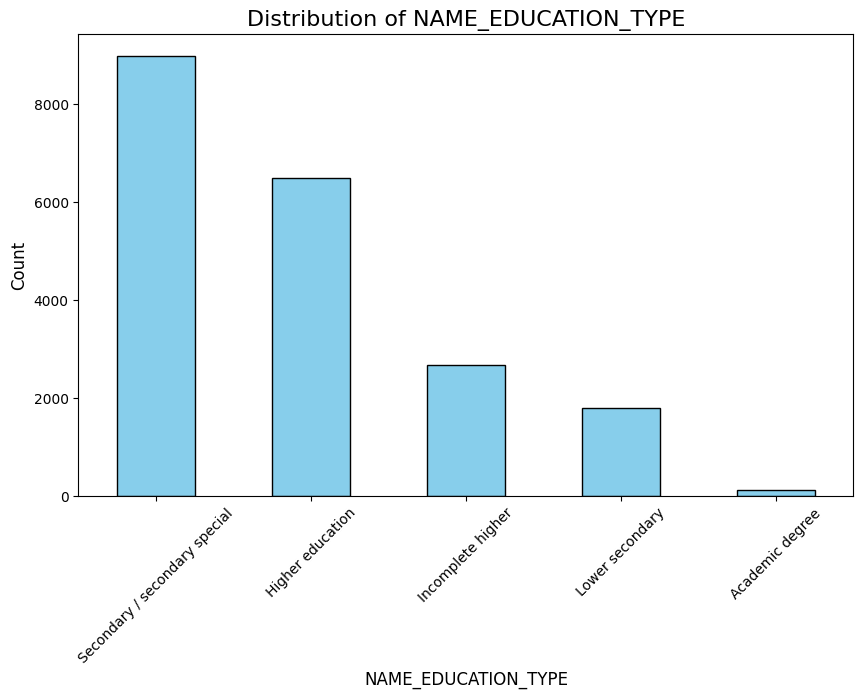

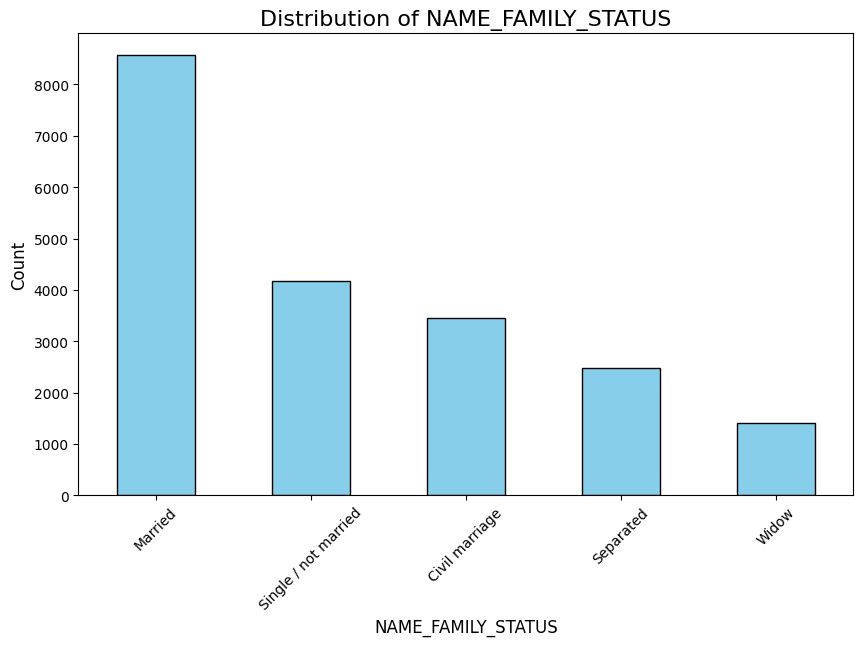

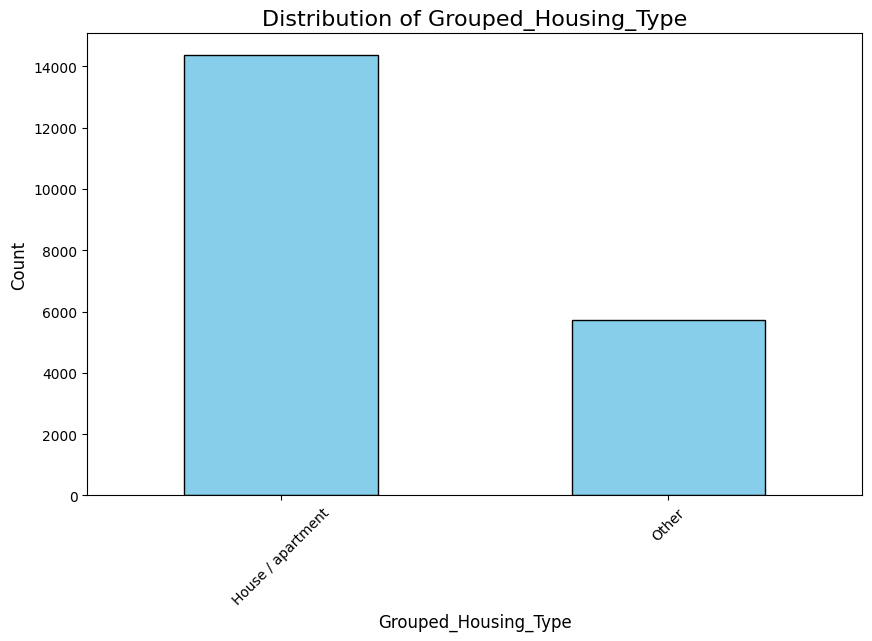

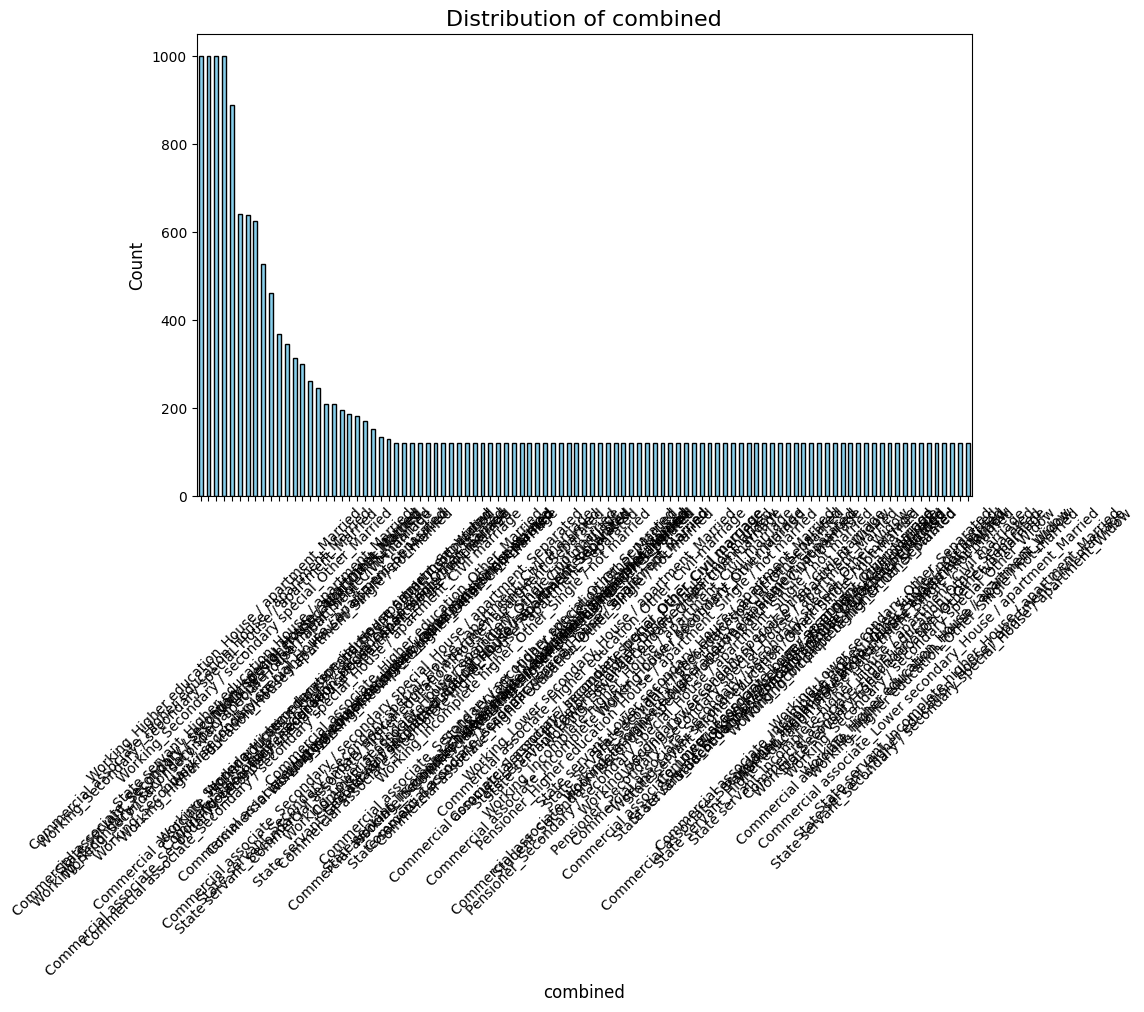

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.2, 
    random_state=42, 
    stratify=data2['label']  
)
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
train_count = train['combined'].value_counts()
display(train_count.describe())
min_samples = 120
max_samples = 1000

balanced_train = pd.DataFrame()
for label, group in train.groupby('combined'):
    if len(group) > max_samples:
       
        sampled_group = group.sample(n=max_samples, random_state=42)
    elif len(group) < min_samples:
        
        sampled_group = group.sample(n=min_samples, replace=True, random_state=42)
    else:
        
        sampled_group = group
    
  
    balanced_train = pd.concat([balanced_train, sampled_group])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)


print("\nBalanced training set distribution:")
print(balanced_train['combined'].value_counts())
display(balanced_train.shape)
balanced_train['combined'].value_counts().plot(kind='bar', figsize=(12, 6), color='lightblue', edgecolor='black')
plt.title("Balanced Training Set Distribution", fontsize=16)
plt.xlabel("Combined Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()
for col in columns_to_check:
    print(f"\nDistribution for {col}:")
    print(balanced_train[col].value_counts())
for col in columns_to_check:
    plt.figure(figsize=(10, 6))
    balanced_train[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
columns_to_drop = ['combined', 'count_x', 'count_y', 'count']
balanced_train_cleaned = balanced_train.drop(columns=columns_to_drop, errors='ignore')

balanced_train_cleaned.to_csv("cleaned_data/balanced_training_set_80percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_80percent.csv", index=False, encoding="utf-8")

In [ ]:
from imblearn.over_sampling import SMOTENC

Training set shape: (21357, 23)
Test set shape: (3769, 23)


count     100.000000
mean      213.570000
std       685.509222
min         1.000000
25%         8.750000
50%        31.500000
75%       134.250000
max      6055.000000
Name: count, dtype: float64


Balanced training set distribution:
combined
Commercial associate_Secondary / secondary special_House / apartment_Married     1000
Working_Secondary / secondary special_House / apartment_Married                  1000
Working_Higher education_House / apartment_Married                               1000
Commercial associate_Higher education_House / apartment_Married                  1000
Working_Secondary / secondary special_House / apartment_Single / not married      958
                                                                                 ... 
Commercial associate_Secondary / secondary special_House / apartment_Widow        150
Commercial associate_Incomplete higher_House / apartment_Married                  150
State servant_Lower secondary_House / apartment_Married                           150
Commercial associate_Incomplete higher_House / apartment_Single / not married     150
Commercial associate_Higher education_House / apartment_Widow                     150
Name: co

(22902, 23)

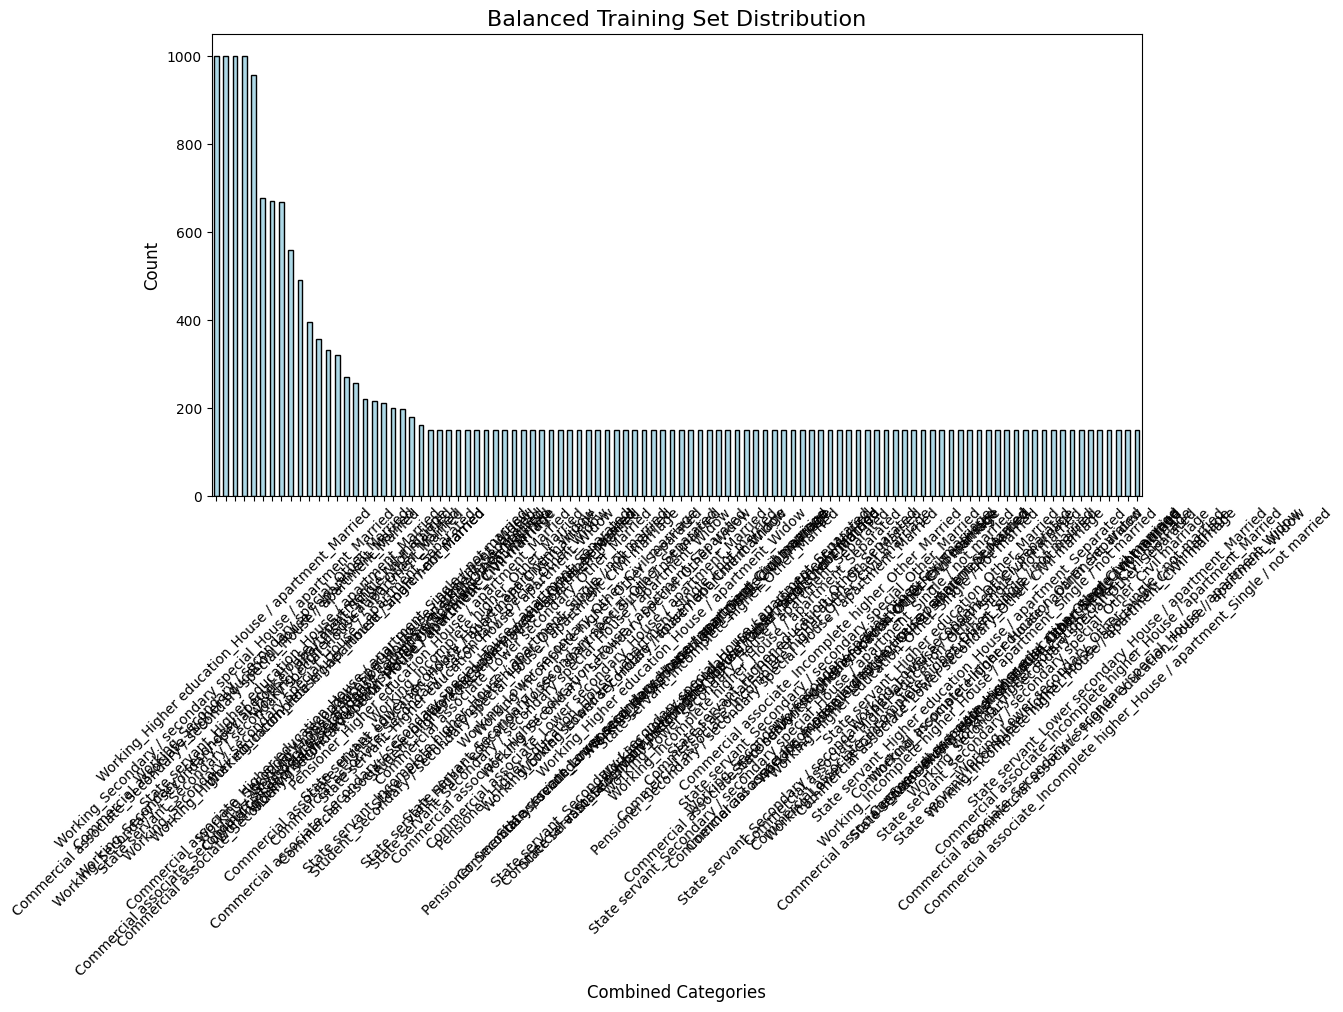


Distribution for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 10113
Commercial associate     7061
State servant            4828
Pensioner                 600
Student                   300
Name: count, dtype: int64

Distribution for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    9844
Higher education                 7236
Incomplete higher                3272
Lower secondary                  2400
Academic degree                   150
Name: count, dtype: int64

Distribution for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 9195
Single / not married    4807
Civil marriage          4226
Separated               2954
Widow                   1720
Name: count, dtype: int64

Distribution for Grouped_Housing_Type:
Grouped_Housing_Type
House / apartment    15995
Other                 6907
Name: count, dtype: int64

Distribution for combined:
combined
Commercial associate_Secondary / secondary special_House / apartment_Married     1000
Work

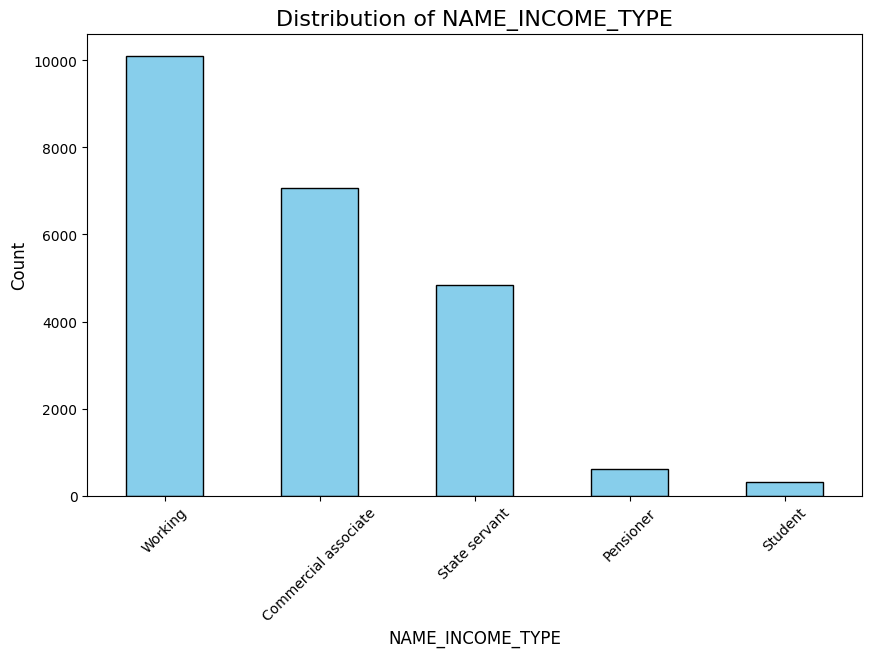

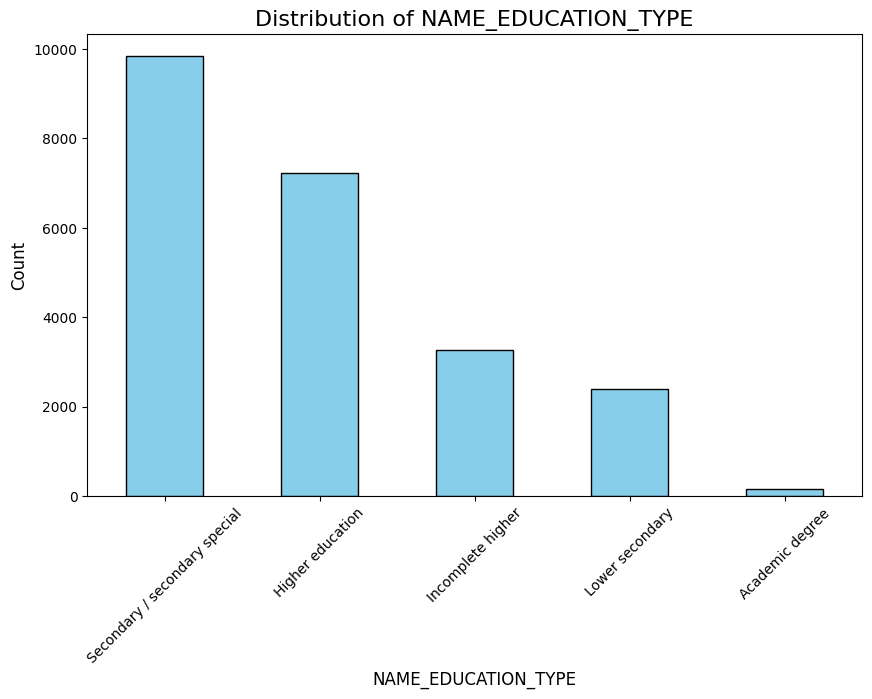

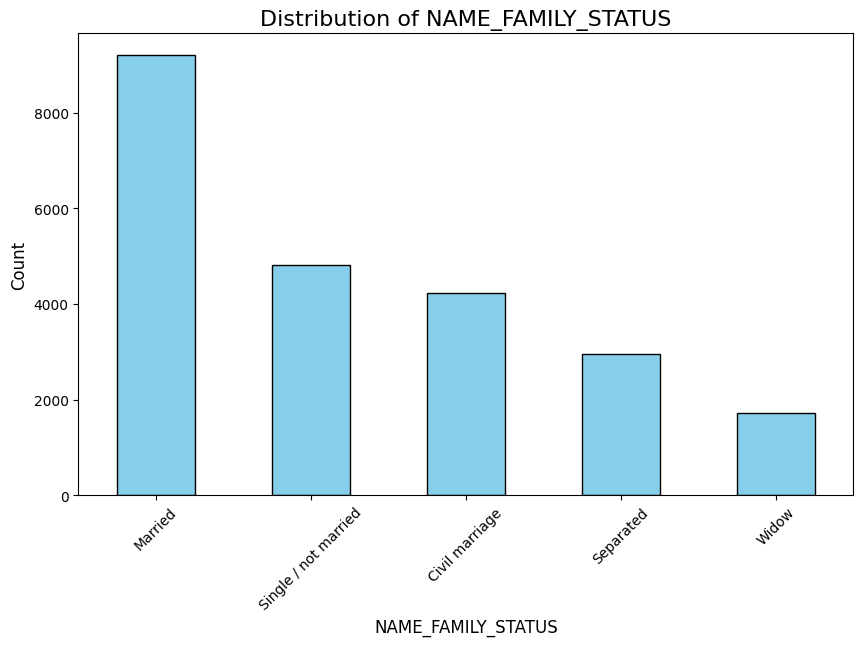

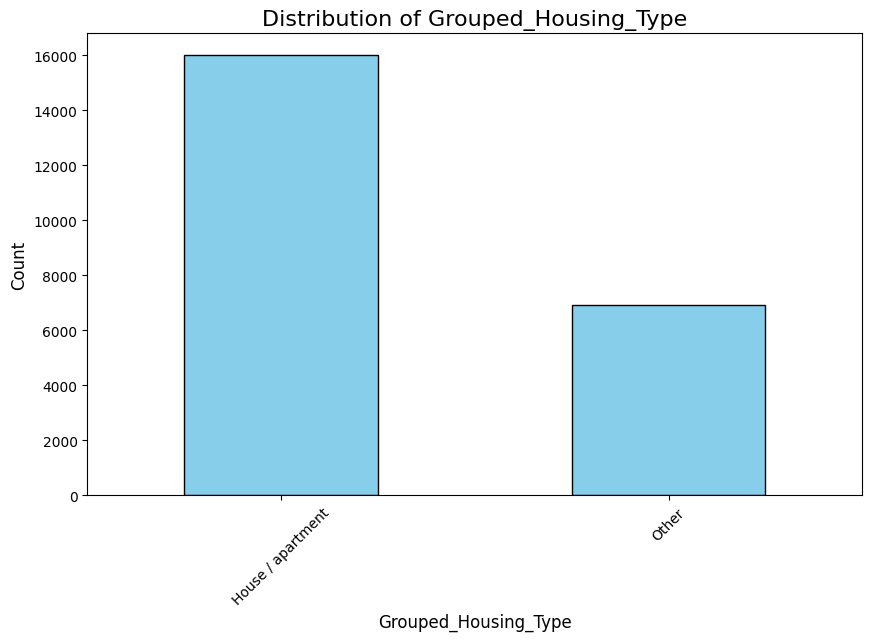

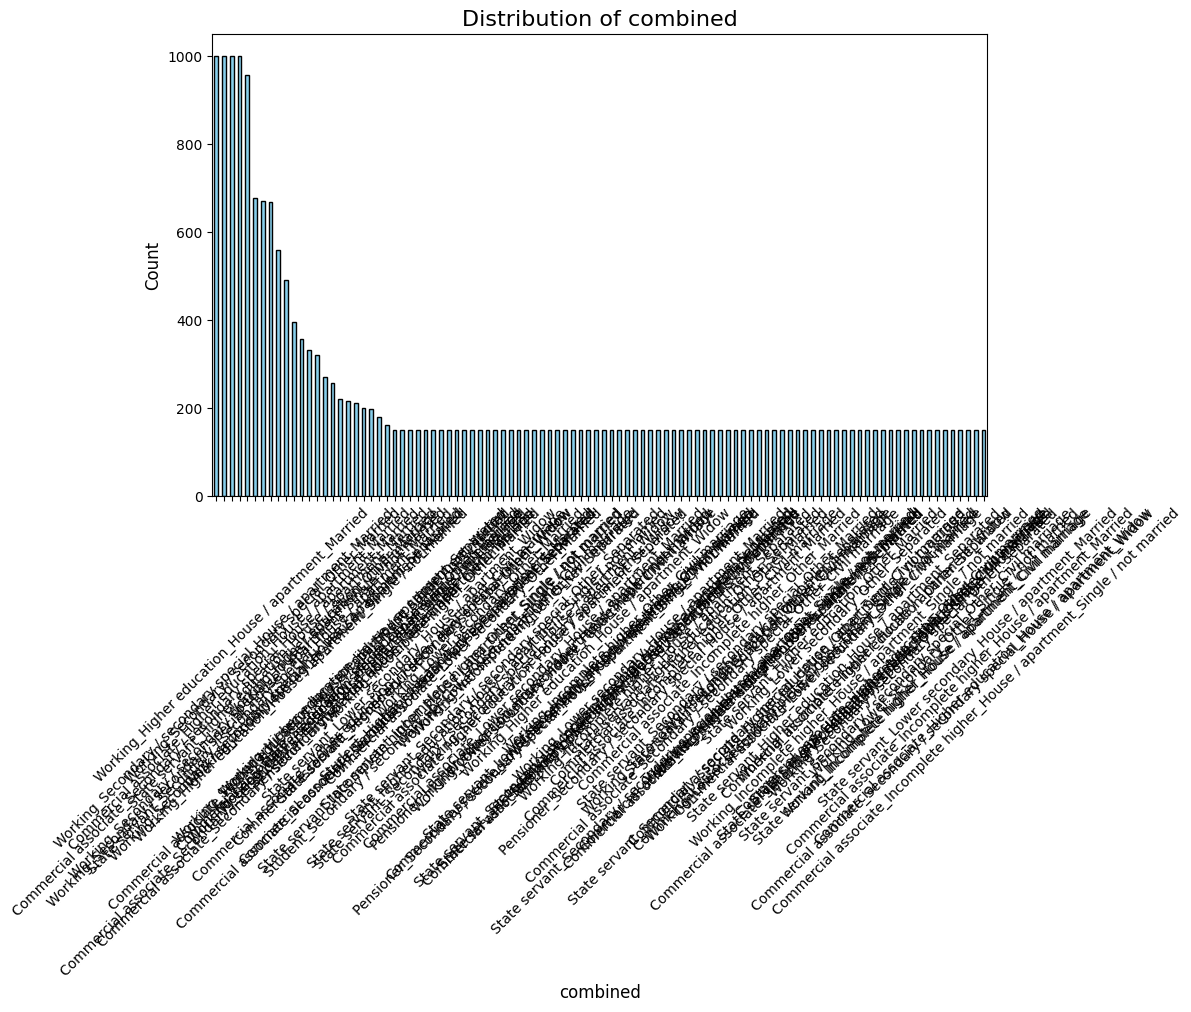

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.15, 
    random_state=42, 
    stratify=data2['label']  
)
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
train_count = train['combined'].value_counts()
display(train_count.describe())
min_samples = 150
max_samples = 1000

balanced_train = pd.DataFrame()
for label, group in train.groupby('combined'):
    if len(group) > max_samples:
       
        sampled_group = group.sample(n=max_samples, random_state=42)
    elif len(group) < min_samples:
        
        sampled_group = group.sample(n=min_samples, replace=True, random_state=42)
    else:
        
        sampled_group = group
    
  
    balanced_train = pd.concat([balanced_train, sampled_group])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)


print("\nBalanced training set distribution:")
print(balanced_train['combined'].value_counts())
display(balanced_train.shape)
balanced_train['combined'].value_counts().plot(kind='bar', figsize=(12, 6), color='lightblue', edgecolor='black')
plt.title("Balanced Training Set Distribution", fontsize=16)
plt.xlabel("Combined Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()
for col in columns_to_check:
    print(f"\nDistribution for {col}:")
    print(balanced_train[col].value_counts())
for col in columns_to_check:
    plt.figure(figsize=(10, 6))
    balanced_train[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
columns_to_drop = ['combined', 'count_x', 'count_y', 'count']
balanced_train_cleaned = balanced_train.drop(columns=columns_to_drop, errors='ignore')

balanced_train_cleaned.to_csv("cleaned_data/balanced_training_set_85percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_85percent.csv", index=False, encoding="utf-8")

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.3, 
    random_state=42, 
    stratify=data2['label']  
)
categorical_columns = ['CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'Grouped_Housing_Type', 'OCCUPATION_TYPE']
display(train.shape)
display(test.shape)

(17588, 23)

(7538, 23)

In [ ]:
X = train.drop(columns=['label','ID','NAME_HOUSING_TYPE_GROUPED','combined','count'])
display(X.shape)
y = train['label']
print(X.dtypes)
X_categorical = X[categorical_columns]


numerical_columns = [col for col in X.columns if col not in categorical_columns]
X_numerical = X[numerical_columns]

X_combined = pd.concat([X_categorical, X_numerical], axis=1)


categorical_features = [X_combined.columns.get_loc(col) for col in categorical_columns]


smotenc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.3,random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_combined, y)

print("Target variable distribution after resampling:")
print(y_resampled.value_counts())
print("Resampled data shape:", X_resampled.shape)
print("Resampled target variable shape:", y_resampled.shape)



(17588, 18)

CODE_GENDER              object
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS         float64
AGE                       int64
DAYS_EMPLOYED_CLEAN     float64
Grouped_Housing_Type     object
dtype: object
Target variable distribution after resampling:
label
0    15426
1     4627
Name: count, dtype: int64
Resampled data shape: (20053, 18)
Resampled target variable shape: (20053,)


In [ ]:
X_resampled_categorical = X_resampled.iloc[:, :len(categorical_columns)]
X_resampled_numerical = X_resampled.iloc[:, len(categorical_columns):]


df_categorical = pd.DataFrame(X_resampled_categorical, columns=categorical_columns)
df_numerical = pd.DataFrame(X_resampled_numerical.values, columns=numerical_columns)


X_resampled_df = pd.concat([df_categorical, df_numerical], axis=1)


y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])


resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

display(resampled_data.head())
display(resampled_data.shape)

resampled_data.to_csv("cleaned_data/resampled_data_smote_73percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_percent73_smote.csv", index=False, encoding="utf-8")

CODE_GENDER      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           F               Working  Secondary / secondary special   
1           F         State servant  Secondary / secondary special   
2           F  Commercial associate  Secondary / secondary special   
3           F               Working  Secondary / secondary special   
4           F               Working  Secondary / secondary special   

  NAME_FAMILY_STATUS Grouped_Housing_Type        OCCUPATION_TYPE  \
0            Married    House / apartment  High skill tech staff   
1            Married    House / apartment  High skill tech staff   
2     Civil marriage    House / apartment            Accountants   
3          Separated    House / apartment  High skill tech staff   
4            Married    House / apartment             Core staff   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
0           1.0              1.0           0.0          189000.0    -18891.0   
1           0.0              1.0           0.0          144000.0    -18136.0   
2           1.0              1.0           0.0          180000.0    -19578.0   
3           0.0              1.0           0.0          324000.0    -16120.0   
4           1.0              0.0           0.0          144000.0    -17383.0   

   DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0         -477.0              0.0         1.0         1.0              2.0   
1       -10110.0              0.0         1.0         0.0              2.0   
2        -5388.0              1.0         1.0         0.0              2.0   
3        -1557.0              0.0         0.0         0.0              1.0   
4         -890.0              1.0         1.0         0.0              2.0   

    AGE  DAYS_EMPLOYED_CLEAN  label  
0  52.0                  1.5      0  
1  50.0                 27.5      0  
2  54.0                 15.0      0  
3  44.0                  4.5      0  
4  48.0                  2.5      0

(20053, 19)

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.2, 
    random_state=42, 
    stratify=data2['label']  
)
categorical_columns = ['CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'Grouped_Housing_Type', 'OCCUPATION_TYPE']
display(train.shape)
display(test.shape)
X = train.drop(columns=['label','ID','NAME_HOUSING_TYPE_GROUPED','combined','count'])
display(X.shape)
y = train['label']
print(X.dtypes)







X_categorical = X[categorical_columns]


numerical_columns = [col for col in X.columns if col not in categorical_columns]
X_numerical = X[numerical_columns]

X_combined = pd.concat([X_categorical, X_numerical], axis=1)


categorical_features = [X_combined.columns.get_loc(col) for col in categorical_columns]


smotenc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.3,random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_combined, y)

print("Target variable distribution after resampling:")
print(y_resampled.value_counts())
print("Resampled data shape:", X_resampled.shape)
print("Resampled target variable shape:", y_resampled.shape)

X_resampled_categorical = X_resampled.iloc[:, :len(categorical_columns)]
X_resampled_numerical = X_resampled.iloc[:, len(categorical_columns):]


df_categorical = pd.DataFrame(X_resampled_categorical, columns=categorical_columns)
df_numerical = pd.DataFrame(X_resampled_numerical.values, columns=numerical_columns)


X_resampled_df = pd.concat([df_categorical, df_numerical], axis=1)


y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])


resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

display(resampled_data.head())
display(resampled_data.shape)




(20100, 23)

(5026, 23)

(20100, 18)

CODE_GENDER              object
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS         float64
AGE                       int64
DAYS_EMPLOYED_CLEAN     float64
Grouped_Housing_Type     object
dtype: object
Target variable distribution after resampling:
label
0    17630
1     5289
Name: count, dtype: int64
Resampled data shape: (22919, 18)
Resampled target variable shape: (22919,)


CODE_GENDER      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           F               Working               Higher education   
1           F  Commercial associate  Secondary / secondary special   
2           M  Commercial associate  Secondary / secondary special   
3           F         State servant  Secondary / secondary special   
4           F  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS Grouped_Housing_Type        OCCUPATION_TYPE  \
0        Civil marriage    House / apartment             Core staff   
1                 Widow    House / apartment            Accountants   
2  Single / not married    House / apartment               Managers   
3               Married    House / apartment  High skill tech staff   
4               Married                Other            Accountants   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
0           0.0              1.0           0.0          112500.0    -10443.0   
1           1.0              1.0           0.0          135000.0    -21581.0   
2           1.0              0.0           0.0          225000.0    -17473.0   
3           1.0              0.0           0.0          112500.0    -21842.0   
4           1.0              1.0           0.0          360000.0    -16477.0   

   DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0         -560.0              0.0         0.0         0.0              2.0   
1        -5467.0              0.0         0.0         0.0              1.0   
2        -2631.0              0.0         0.0         0.0              1.0   
3        -3869.0              0.0         0.0         0.0              2.0   
4        -2997.0              0.0         0.0         0.0              2.0   

    AGE  DAYS_EMPLOYED_CLEAN  label  
0  29.0                  1.5      0  
1  59.0                 15.0      0  
2  48.0                  7.0      1  
3  60.0                 10.5      0  
4  45.0                  8.0      0

(22919, 19)

In [ ]:

resampled_data.to_csv("cleaned_data/resampled_data_smote_82percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_percent82_smote.csv", index=False, encoding="utf-8")

In [ ]:
train, test = train_test_split(
    data2, 
    test_size=0.15, 
    random_state=42, 
    stratify=data2['label']  
)
categorical_columns = ['CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'Grouped_Housing_Type', 'OCCUPATION_TYPE']
display(train.shape)
display(test.shape)
X = train.drop(columns=['label','ID','NAME_HOUSING_TYPE_GROUPED','combined','count'])
display(X.shape)
y = train['label']
print(X.dtypes)







X_categorical = X[categorical_columns]


numerical_columns = [col for col in X.columns if col not in categorical_columns]
X_numerical = X[numerical_columns]

X_combined = pd.concat([X_categorical, X_numerical], axis=1)


categorical_features = [X_combined.columns.get_loc(col) for col in categorical_columns]


smotenc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.3,random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_combined, y)

print("Target variable distribution after resampling:")
print(y_resampled.value_counts())
print("Resampled data shape:", X_resampled.shape)
print("Resampled target variable shape:", y_resampled.shape)

X_resampled_categorical = X_resampled.iloc[:, :len(categorical_columns)]
X_resampled_numerical = X_resampled.iloc[:, len(categorical_columns):]


df_categorical = pd.DataFrame(X_resampled_categorical, columns=categorical_columns)
df_numerical = pd.DataFrame(X_resampled_numerical.values, columns=numerical_columns)


X_resampled_df = pd.concat([df_categorical, df_numerical], axis=1)


y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])


resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

display(resampled_data.head())
display(resampled_data.shape)


(21357, 23)

(3769, 23)

(21357, 18)

CODE_GENDER              object
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS         float64
AGE                       int64
DAYS_EMPLOYED_CLEAN     float64
Grouped_Housing_Type     object
dtype: object
Target variable distribution after resampling:
label
0    18732
1     5619
Name: count, dtype: int64
Resampled data shape: (24351, 18)
Resampled target variable shape: (24351,)


CODE_GENDER      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           F               Working  Secondary / secondary special   
1           F         State servant  Secondary / secondary special   
2           F  Commercial associate  Secondary / secondary special   
3           F  Commercial associate  Secondary / secondary special   
4           M         State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS Grouped_Housing_Type        OCCUPATION_TYPE  \
0             Separated    House / apartment             Core staff   
1               Married    House / apartment         Medicine staff   
2  Single / not married    House / apartment  Private service staff   
3             Separated    House / apartment            Sales staff   
4               Married    House / apartment               Laborers   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
0           0.0              1.0           2.0          135000.0    -14874.0   
1           0.0              1.0           0.0          157500.0    -18333.0   
2           1.0              0.0           1.0          225000.0    -12713.0   
3           0.0              1.0           0.0          387000.0    -18147.0   
4           1.0              1.0           1.0          225000.0    -11695.0   

   DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0        -2407.0              0.0         0.0         0.0              3.0   
1        -7213.0              0.0         0.0         0.0              2.0   
2        -1810.0              1.0         0.0         0.0              2.0   
3         -642.0              0.0         0.0         0.0              1.0   
4        -3929.0              1.0         0.0         0.0              3.0   

    AGE  DAYS_EMPLOYED_CLEAN  label  
0  41.0                  6.5      1  
1  50.0                 20.0      1  
2  35.0                  5.0      0  
3  50.0                  2.0      0  
4  32.0                 11.0      0

(24351, 19)

In [ ]:

resampled_data.to_csv("cleaned_data/resampled_data_smote_86percent.csv", index=False, encoding="utf-8")
test.to_csv("cleaned_data/test_set_percent86_smote.csv", index=False, encoding="utf-8")